# 1.Übung

### Zelle 1 – NumPy-Basic

In [1]:
import numpy as np

data = [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
grades = np.array(data)

print("Grades array:", grades)
print("Shape:", grades.shape)
print("Mean grade:", grades.mean())


Grades array: [50 50 47 97 49  3 53 42 26 74 82 62 37 15 70 27 36 35 48 52 63 64]
Shape: (22,)
Mean grade: 49.18181818181818


### Zelle 2 – Mehrdimensionale Arrays

In [2]:
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

student_data = np.array([study_hours, grades])

avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print(f"Average study hours: {avg_study:.2f}")
print(f"Average grade: {avg_grade:.2f}")


Average study hours: 10.52
Average grade: 49.18


### Zelle 3 – Pandas DataFrame

In [3]:
import pandas as pd

df_students = pd.DataFrame({
    'Name': ['Dan','Joann','Pedro','Rosie','Ethan','Vicky','Frederic','Jimmie',
             'Rhonda','Giovanni','Francesca','Rajab','Naiyana','Kian','Jenny',
             'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'],
    'StudyHours': student_data[0],
    'Grade': student_data[1]
})

df_students.head()


,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


### Zelle 4 – Filtern & Analysieren

In [4]:
mean_study = df_students['StudyHours'].mean()
mean_grade = df_students['Grade'].mean()

print(f"Average Study Hours: {mean_study:.2f}")
print(f"Average Grade: {mean_grade:.2f}")

# Studierende, die überdurchschnittlich gelernt haben
above_avg = df_students[df_students.StudyHours > mean_study]
print("\nStudents with above-average study hours:")
print(above_avg)

# Durchschnittsnote dieser Gruppe
print("\nMean grade of that group:", above_avg.Grade.mean())


Average Study Hours: 10.52
Average Grade: 49.18

Students with above-average study hours:
         Name  StudyHours  Grade
1       Joann       11.50   50.0
3       Rosie       16.00   97.0
6    Frederic       11.50   53.0
9    Giovanni       14.50   74.0
10  Francesca       15.50   82.0
11      Rajab       13.75   62.0
14      Jenny       15.50   70.0
19       Skye       12.00   52.0
20     Daniel       12.50   63.0
21      Aisha       12.00   64.0

Mean grade of that group: 66.7


### Zelle 5 – list vs array

In [5]:
# list vs. numpy array
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
import numpy as np
grades = np.array(data)

print(type(data), 'x2:', data * 2)      # Liste verdoppelt die Sequenz
print('---')
print(type(grades), 'x2:', grades * 2)  # Array rechnet elementweise


<class 'list'> x2: [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
---
<class 'numpy.ndarray'> x2: [100 100  94 194  98   6 106  84  52 148 164 124  74  30 140  54  72  70
  96 104 126 128]


### Zelle 6 – loc / iloc / query

In [6]:
import pandas as pd

df_students = pd.DataFrame({
    'Name': ['Dan','Joann','Pedro','Rosie','Ethan','Vicky','Frederic','Jimmie',
             'Rhonda','Giovanni','Francesca','Rajab','Naiyana','Kian','Jenny',
             'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'],
    'StudyHours': student_data[0],
    'Grade': student_data[1]
})

print(df_students.loc[5])          # nach Index-Label
print(df_students.loc[0:5])        # inkl. 5
print(df_students.iloc[0:5])       # exkl. 5 (positionsbasiert)
print(df_students.iloc[0,[1,2]])   # Spalten pos 1 & 2 in Zeile 0
print(df_students.loc[0,'Grade'])  # Spalte per Name
print(df_students[df_students['Name'] == 'Aisha'])
print(df_students.query('Name == "Aisha"'))


Name          Vicky
StudyHours      1.0
Grade           3.0
Name: 5, dtype: object
    Name  StudyHours  Grade
0    Dan       10.00   50.0
1  Joann       11.50   50.0
2  Pedro        9.00   47.0
3  Rosie       16.00   97.0
4  Ethan        9.25   49.0
5  Vicky        1.00    3.0
    Name  StudyHours  Grade
0    Dan       10.00   50.0
1  Joann       11.50   50.0
2  Pedro        9.00   47.0
3  Rosie       16.00   97.0
4  Ethan        9.25   49.0
StudyHours    10.0
Grade         50.0
Name: 0, dtype: object
50.0
     Name  StudyHours  Grade
21  Aisha        12.0   64.0
     Name  StudyHours  Grade
21  Aisha        12.0   64.0


### Zelle 7 – CSV + Missing Values + Pass/Fail + groupby + sort
##### Lege grades.csv in denselben Ordner wie dein Notebook.

In [8]:
# CSV laden
df_students = pd.read_csv('grades.csv', delimiter=',', header='infer')
print(df_students.head())

# Missing Values finden & behandeln
print(df_students.isnull().sum())
print(df_students[df_students.isnull().any(axis=1)])

df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
df_students = df_students.dropna(axis=0, how='any')  # restliche NaNs entfernen
print(df_students.isnull().sum())

# Mittelwerte + Filter > Durchschnitt
mean_study = df_students['StudyHours'].mean()
mean_grade = df_students.Grade.mean()
print(f'Average weekly study hours: {mean_study:.2f}\nAverage grade: {mean_grade:.2f}')
print(df_students[df_students.StudyHours > mean_study].Grade.mean())

# Pass/Fail-Spalte, groupby, sortieren
passes = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename('Pass')], axis=1)
print(df_students.groupby(df_students.Pass).Name.count())
print(df_students.groupby(df_students.Pass)[['StudyHours','Grade']].mean())

df_students = df_students.sort_values('Grade', ascending=False)
df_students.head()


    Name  StudyHours  Grade
0    Dan       10.00   50.0
1  Joann       11.50   50.0
2  Pedro        9.00   47.0
3  Rosie       16.00   97.0
4  Ethan        9.25   49.0
Name          0
StudyHours    1
Grade         2
dtype: int64
    Name  StudyHours  Grade
22  Bill         8.0    NaN
23   Ted         NaN    NaN
Name          0
StudyHours    0
Grade         0
dtype: int64
Average weekly study hours: 10.52
Average grade: 49.18
66.7
Pass
False    15
True      7
Name: Name, dtype: int64
       StudyHours      Grade
Pass                        
False    8.783333  38.000000
True    14.250000  73.142857


,Name,StudyHours,Grade,Pass
3,Rosie,16.0,97.0,True
10,Francesca,15.5,82.0,True
9,Giovanni,14.5,74.0,True
14,Jenny,15.5,70.0,True
21,Aisha,12.0,64.0,True


## Bibliotheken importieren

Wir verwenden **Pandas** für die Datenverwaltung und **Matplotlib** zur grafischen Darstellung.
Pandas hilft uns, Daten in Tabellenform (DataFrames) zu speichern, und Matplotlib ermöglicht es,
diese Daten visuell als Diagramme darzustellen.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


## Datentabelle erstellen

Hier definieren wir eine kleine Beispiel-Datenreihe, die die Bewegung eines selbstfahrenden Autos zeigt.  
- **Time**: Zeitpunkte der Messung  
- **Standort-X** und **Standort-Y**: Position des Autos in einem zweidimensionalen Raum  

Die Daten werden anschließend als **Pandas DataFrame** gespeichert, damit wir sie leichter analysieren und darstellen können.


In [10]:
data = {
    'Time': [0,1,2,3,4,5,6,7,12,13,14,15,16,17,18,19,20],
    'Standort-X': [0,1.682942,1.818595,0.28224,-1.5136,-1.91785,-0.55883,1.313973,0.00001,0.840334,1.981215,1.300576,-0.57581,-1.92279,-1.50197,0.299754,1.825891],
    'Standort-Y': [2,1.080605,-0.83229,-1.97998,-1.30729,0.567324,1.920341,1.507805,0.00001,1.814894,0.273474,-1.51938,-1.91532,-0.55033,1.320633,1.977409,0.816164]
}

df = pd.DataFrame(data)
df.head()


,Time,Standort-X,Standort-Y
0,0,0.000000,2.000000
1,1,1.682942,1.080605
2,2,1.818595,-0.832290
3,3,0.282240,-1.979980
4,4,-1.513600,-1.307290


## Standort-X über Zeit darstellen

Hier wird der **Verlauf der X-Position über die Zeit** geplottet.  
So erkennen wir, wie sich der Standort auf der X-Achse verändert.  
Der Parameter `marker='o'` fügt Punkte hinzu, um jede Messung sichtbar zu machen.  
Das Diagramm hilft, mögliche Lücken oder Ausreißer in der Bewegung zu erkennen.


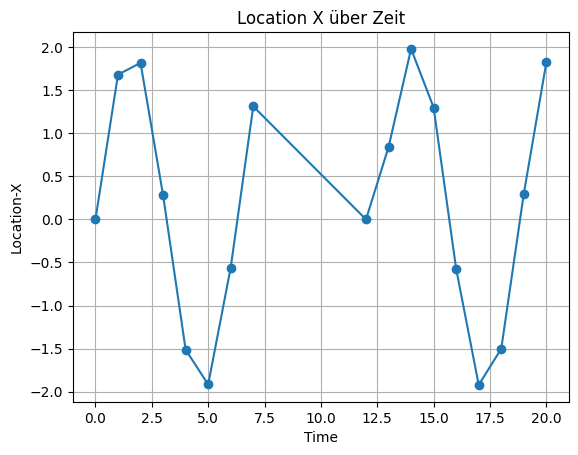

In [11]:
plt.plot(df['Time'], df['Standort-X'], marker='o')
plt.xlabel('Time')
plt.ylabel('Location-X')
plt.title('Location X über Zeit')
plt.grid(True)
plt.show()


## Fahrweg des Autos darstellen (X gegen Y)

Hier wird **Standort-X gegen Standort-Y** geplottet, um den Fahrweg zu visualisieren.  
Das ergibt eine **zweidimensionale Karte** des Bewegungsverlaufs.  
Da die Punkte einen Kreis bilden, erkennen wir, dass das Auto sich **kreisförmig bewegt hat**.  
Mit `plt.axis('equal')` stellen wir sicher, dass die Achsen gleich skaliert sind.


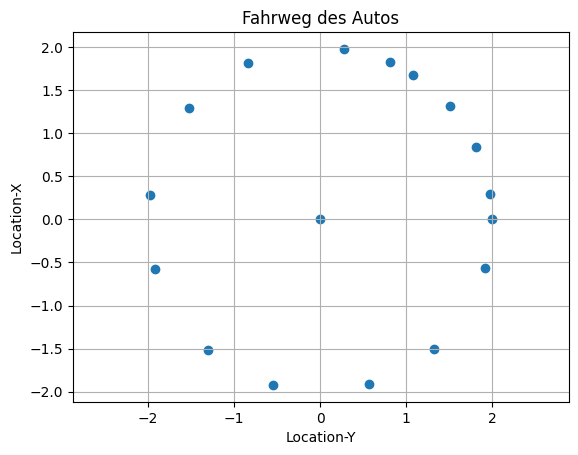

In [12]:
plt.scatter(df['Standort-Y'], df['Standort-X'])
plt.xlabel('Location-Y')
plt.ylabel('Location-X')
plt.title('Fahrweg des Autos')
plt.grid(True)
plt.axis('equal')
plt.show()


### 2.Übung 

### Daten laden und vorbereiten
Wir lesen `grades.csv` als DataFrame ein, entfernen fehlende Zeilen und erzeugen eine neue Spalte **Pass** (Note ≥ 60).


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
df_students = pd.read_csv('grades.csv', delimiter=',', header='infer')

# fehlende Zeilen entfernen
df_students = df_students.dropna(axis=0, how='any')

# Pass/Fail-Spalte
passes = pd.Series(df_students['Grade'] >= 60, name='Pass')
df_students = pd.concat([df_students, passes], axis=1)

df_students.head()


,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False


### Erster Balken-Plot (Noten pro Student)
Einfache Visualisierung: Name auf der X-Achse, Note auf der Y-Achse.


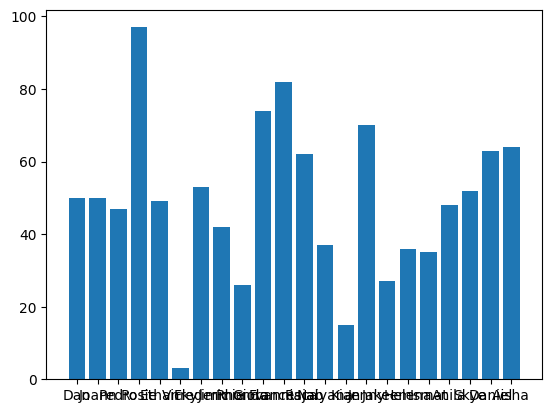

In [14]:
plt.bar(x=df_students['Name'], height=df_students['Grade'])
plt.show()


### Plot formatieren (Titel, Achsenlabels, Gitter, Rotationen)
Wir machen den Plot lesbarer: Farbe, Titel, Achsenbeschriftungen, Gitterlinien und gedrehte X-Labels.


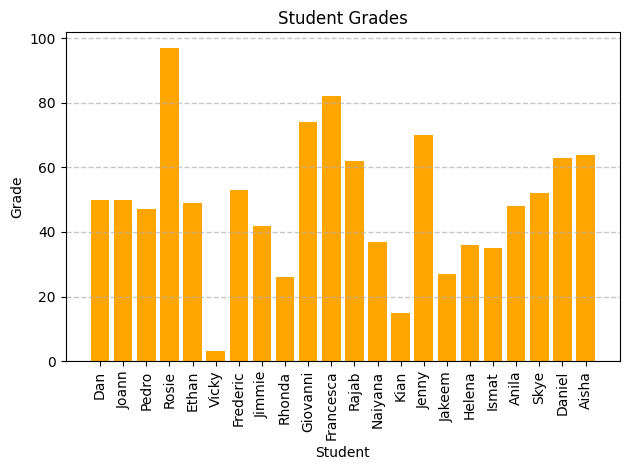

In [15]:
plt.bar(x=df_students['Name'], height=df_students['Grade'], color='orange')
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(axis='y', linestyle='--', linewidth=1, alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Figure explizit erzeugen (Größe steuern)
Wir erstellen eine Figure mit definierter Größe und zeichnen den Balken-Plot erneut.


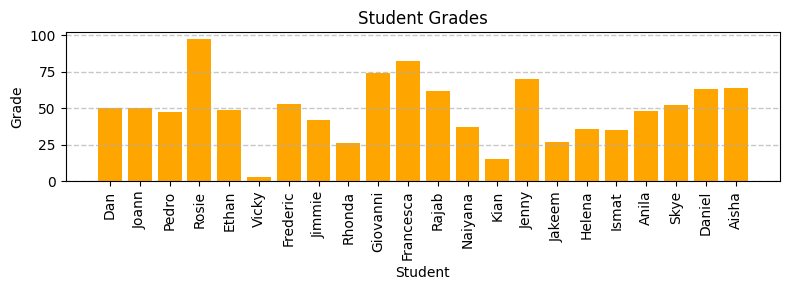

In [16]:
fig = plt.figure(figsize=(8, 3))
plt.bar(x=df_students['Name'], height=df_students['Grade'], color='orange')
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(axis='y', linestyle='--', linewidth=1, alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Zwei Subplots: Balken-Chart (Noten) und Torten-Chart (Bestanden/Nicht bestanden)
Wir zeichnen zwei Diagramme nebeneinander und geben der gesamten Figure einen gemeinsamen Titel.


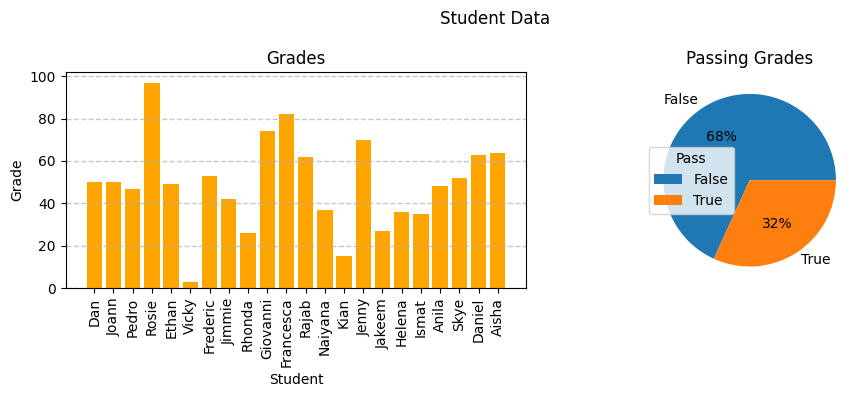

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Balken links
ax[0].bar(x=df_students['Name'], height=df_students['Grade'], color='orange')
ax[0].set_title('Grades')
ax[0].set_xlabel('Student')
ax[0].set_ylabel('Grade')
ax[0].grid(axis='y', linestyle='--', linewidth=1, alpha=0.7)
ax[0].tick_params(axis='x', labelrotation=90)

# Torte rechts
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts.index.astype(str), autopct='%1.0f%%')
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.index.astype(str), title='Pass')

# Gesamttitel & Layout
fig.suptitle('Student Data')
plt.tight_layout()
plt.show()


### Direkt mit Pandas plotten
DataFrames besitzen eigene Plot-Methoden. Hier: Balkendiagramm der Lernstunden pro Student.


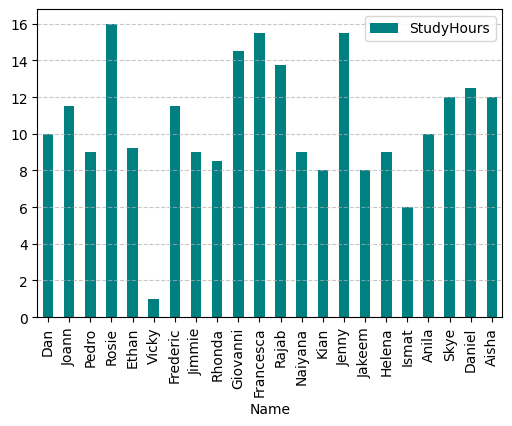

In [18]:
ax = df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))
ax.grid(axis='y', linestyle='--', alpha=0.7)


### Verteilung als Histogramm
Wir betrachten die Häufigkeitsverteilung der **Noten** als Histogramm, um Form, Zentrum und Streuung der Daten zu erkennen.


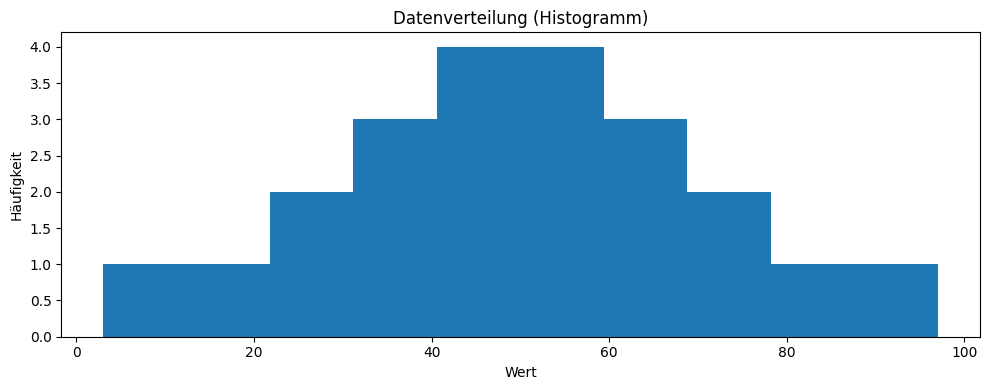

In [19]:
var_data = df_students['Grade']

plt.figure(figsize=(10,4))
plt.hist(var_data)
plt.title('Datenverteilung (Histogramm)')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.tight_layout()
plt.show()


### Lage-Maße berechnen und im Histogramm markieren
Wir berechnen **Minimum, Maximum, Mittelwert, Median, Modus** und zeichnen sie als vertikale Linien in das Histogramm ein.


Minimum: 3.00
Mean: 49.18
Median: 49.50
Mode: 50.00
Maximum: 97.00



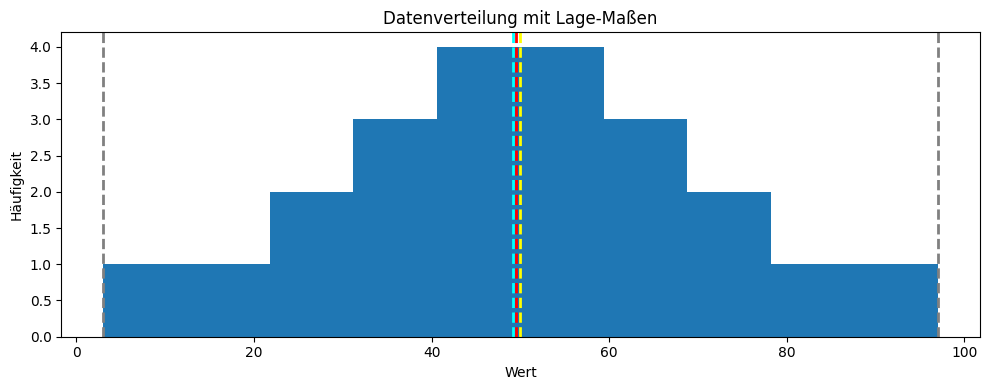

In [20]:
var = df_students['Grade']

min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val  = var.median()
mod_val  = var.mode()[0]

print(f"Minimum: {min_val:.2f}\nMean: {mean_val:.2f}\nMedian: {med_val:.2f}\nMode: {mod_val:.2f}\nMaximum: {max_val:.2f}\n")

plt.figure(figsize=(10,4))
plt.hist(var)

plt.axvline(x=min_val, color='gray',   linestyle='--', linewidth=2)
plt.axvline(x=mean_val, color='cyan',  linestyle='--', linewidth=2)
plt.axvline(x=med_val,  color='red',   linestyle='--', linewidth=2)
plt.axvline(x=mod_val,  color='yellow',linestyle='--', linewidth=2)
plt.axvline(x=max_val,  color='gray',  linestyle='--', linewidth=2)

plt.title('Datenverteilung mit Lage-Maßen')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.tight_layout()
plt.show()


### Boxplot der Noten
Der **Boxplot** zeigt Median, Quartile (Box) und mögliche Ausreißer (Whisker) kompakt.


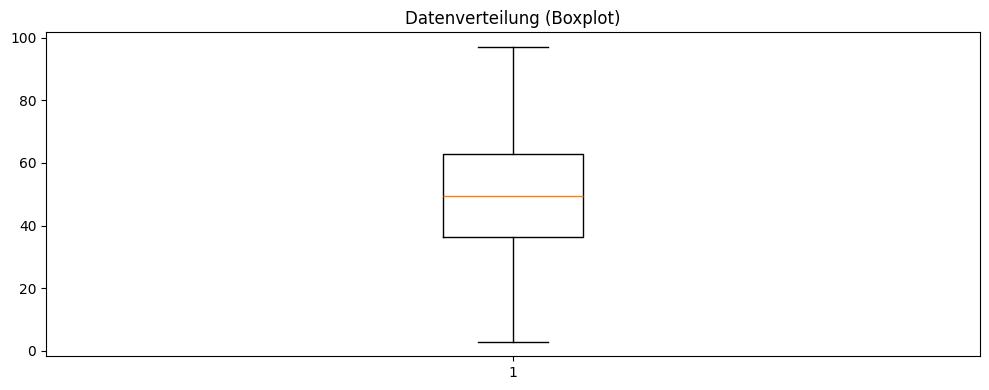

In [21]:
plt.figure(figsize=(10,4))
plt.boxplot(df_students['Grade'])
plt.title('Datenverteilung (Boxplot)')
plt.tight_layout()
plt.show()


### Funktion: Histogramm + Boxplot kombiniert
Hilfsfunktion, die Histogramm (oben) und **horizontalen** Boxplot (unten) inkl. Lage-Maßen gemeinsam zeigt.


Minimum: 3.00
Mean: 49.18
Median: 49.50
Mode: 50.00
Maximum: 97.00



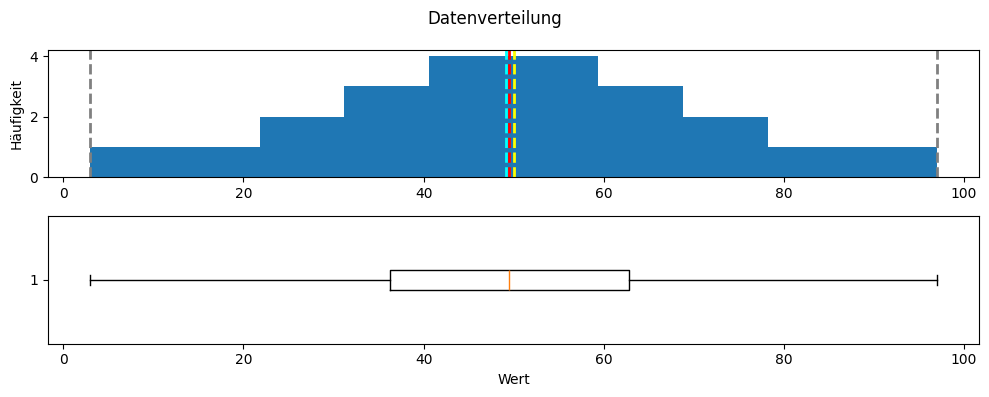

In [22]:
def show_distribution(var_data):
    import matplotlib.pyplot as plt

    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val  = var_data.median()
    mod_val  = var_data.mode()[0]

    print(f"Minimum: {min_val:.2f}\nMean: {mean_val:.2f}\nMedian: {med_val:.2f}\nMode: {mod_val:.2f}\nMaximum: {max_val:.2f}\n")

    fig, ax = plt.subplots(2, 1, figsize=(10,4))

    # Histogramm
    ax[0].hist(var_data)
    ax[0].set_ylabel('Häufigkeit')
    ax[0].axvline(x=min_val,  color='gray',   linestyle='--', linewidth=2)
    ax[0].axvline(x=mean_val, color='cyan',   linestyle='--', linewidth=2)
    ax[0].axvline(x=med_val,  color='red',    linestyle='--', linewidth=2)
    ax[0].axvline(x=mod_val,  color='yellow', linestyle='--', linewidth=2)
    ax[0].axvline(x=max_val,  color='gray',   linestyle='--', linewidth=2)

    # Boxplot horizontal
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Wert')

    fig.suptitle('Datenverteilung')
    fig.tight_layout()
    plt.show()

# Aufruf mit der Noten-Spalte
show_distribution(df_students['Grade'])


### Dichtekurve (KDE)
Die **Dichteschätzung** zeigt eine geglättete Verteilungskurve. Wir markieren Mittelwert, Median und Modus.


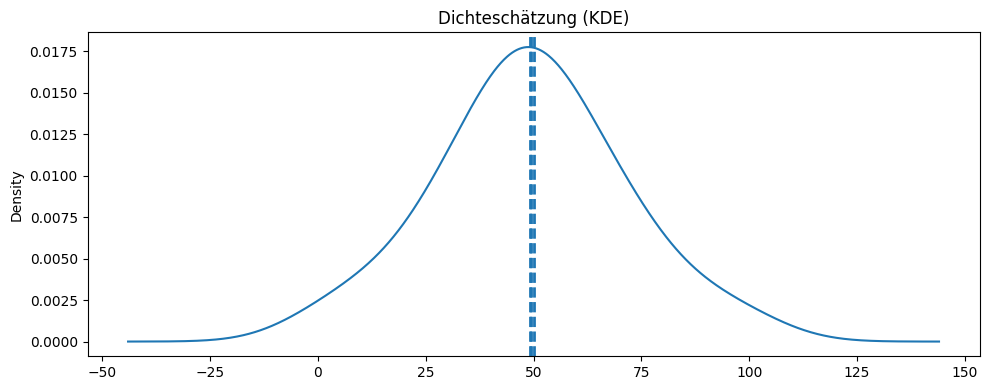

In [23]:
def show_density(var_data):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10,4))
    var_data.plot.density()  # Pandas nutzt intern Matplotlib
    plt.title('Dichteschätzung (KDE)')

    plt.axvline(x=var_data.mean(),   linestyle='--', linewidth=2)
    plt.axvline(x=var_data.median(), linestyle='--', linewidth=2)
    plt.axvline(x=var_data.mode()[0],linestyle='--', linewidth=2)

    plt.tight_layout()
    plt.show()

show_density(df_students['Grade'])


# 3.Übung 

# Explore data with Python - real-world data

In this notebook, you'll explore non-normal data distributions and how to make basic comparisons between data.


In [25]:
import pandas as pd
from matplotlib import pyplot as plt

# CSV-Datei laden
df_students = pd.read_csv('grades.csv', delimiter=',', header='infer')

# Fehlende Werte entfernen
df_students = df_students.dropna(axis=0, how='any')

# "Pass" berechnen (Note >= 60)
passes = pd.Series(df_students['Grade'] >= 60)

# In DataFrame einfügen
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

print(df_students)


         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True


## Visualizing data distribution (Grades)

Wir definieren eine wiederverwendbare Funktion, um Histogramm + Boxplot zu zeigen.


Minimum: 3.00
Mean: 49.18
Median: 49.50
Mode: 50.00
Maximum: 97.00



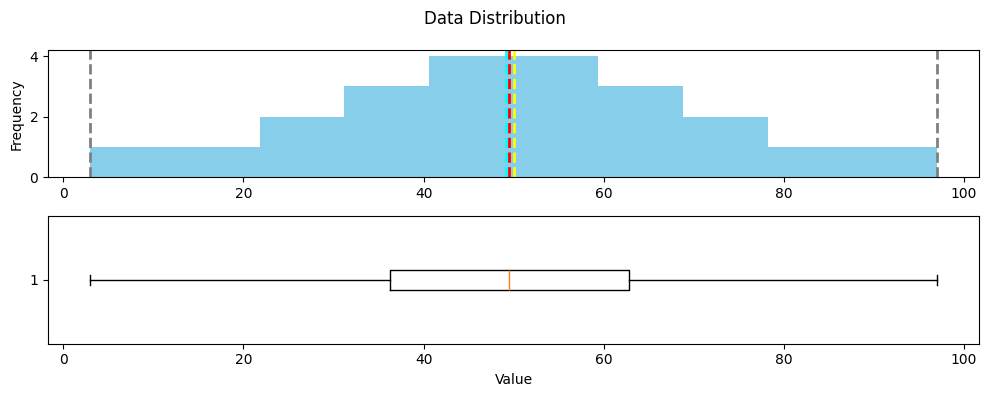

In [26]:
def show_distribution(var_data):
    """Zeigt Histogramm + Boxplot + Statistik an"""
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(f"Minimum: {min_val:.2f}\nMean: {mean_val:.2f}\nMedian: {med_val:.2f}\nMode: {mod_val:.2f}\nMaximum: {max_val:.2f}\n")

    fig, ax = plt.subplots(2, 1, figsize=(10, 4))

    # Histogramm
    ax[0].hist(var_data, color='skyblue')
    ax[0].set_ylabel('Frequency')
    for x, c in zip([min_val, mean_val, med_val, mod_val, max_val],
                    ['gray', 'cyan', 'red', 'yellow', 'gray']):
        ax[0].axvline(x=x, color=c, linestyle='dashed', linewidth=2)

    # Boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    fig.suptitle('Data Distribution')
    plt.tight_layout()
    plt.show()

# Aufrufen für die Noten
show_distribution(df_students['Grade'])


## Untersuchen der Lernstunden (StudyHours)


Minimum: 1.00
Mean: 10.52
Median: 10.00
Mode: 9.00
Maximum: 16.00



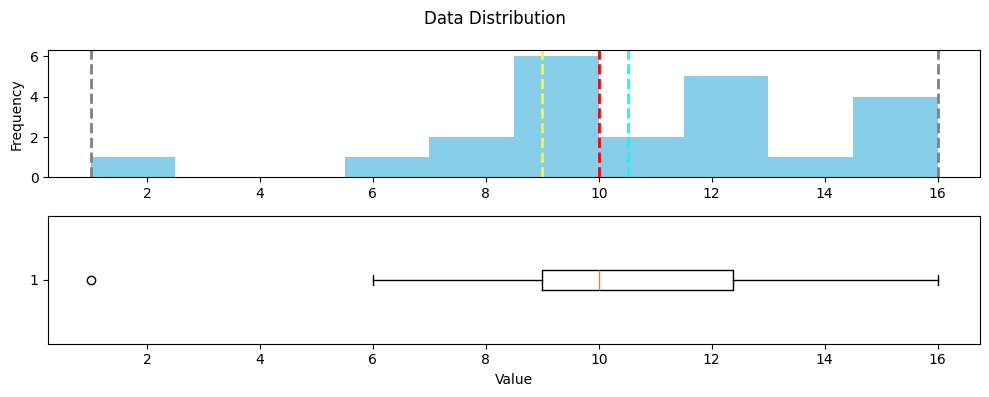

In [27]:
show_distribution(df_students['StudyHours'])


### Entfernen von Ausreißern (Outliers)
Wir filtern alle Studierenden mit weniger als 1 Stunde Lernzeit heraus.


Minimum: 6.00
Mean: 10.98
Median: 10.00
Mode: 9.00
Maximum: 16.00



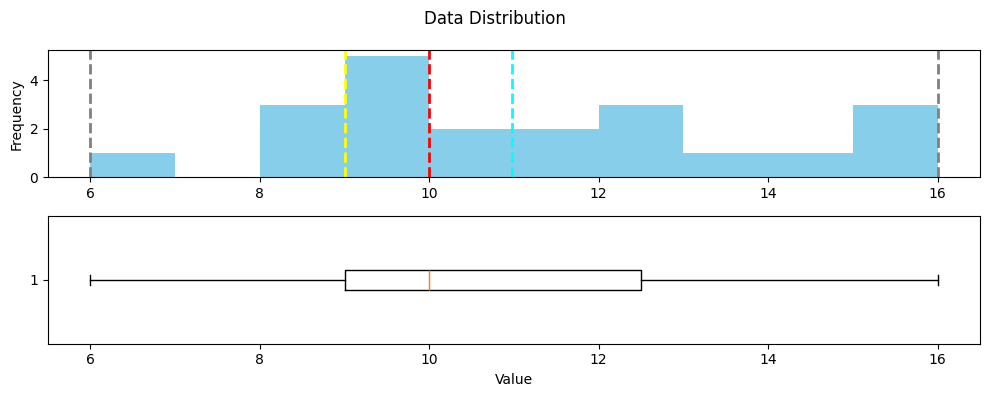

In [28]:
col = df_students[df_students['StudyHours'] > 1]['StudyHours']
show_distribution(col)


### Alternative Methode – Perzentil-Grenze
Wir entfernen Werte unterhalb des 1. Perzentils.


Minimum: 6.00
Mean: 10.98
Median: 10.00
Mode: 9.00
Maximum: 16.00



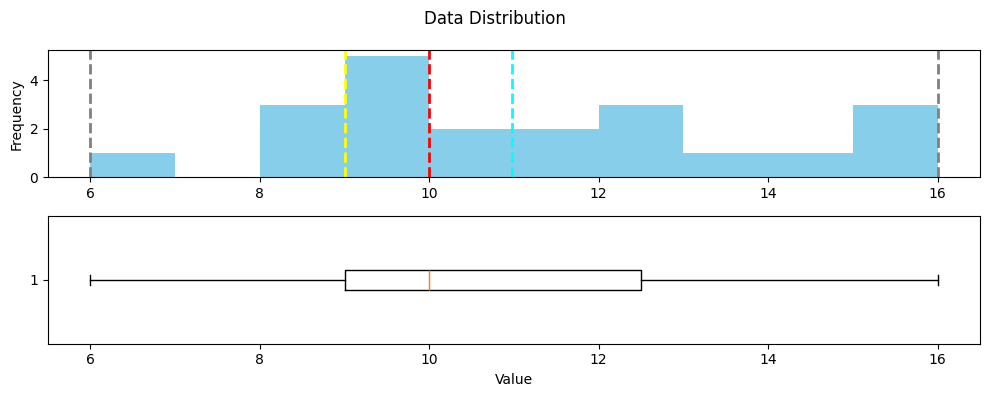

In [29]:
q01 = df_students.StudyHours.quantile(0.01)
col = df_students[df_students.StudyHours > q01]['StudyHours']
show_distribution(col)


## Dichte (Density) der Lernstunden darstellen


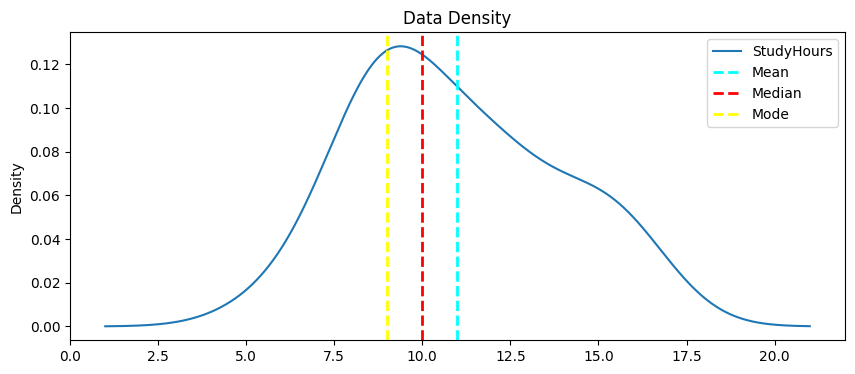

In [30]:
def show_density(var_data):
    fig = plt.figure(figsize=(10, 4))
    var_data.plot.density()

    plt.title('Data Density')
    plt.axvline(var_data.mean(), color='cyan', linestyle='--', linewidth=2, label='Mean')
    plt.axvline(var_data.median(), color='red', linestyle='--', linewidth=2, label='Median')
    plt.axvline(var_data.mode()[0], color='yellow', linestyle='--', linewidth=2, label='Mode')
    plt.legend()
    plt.show()

show_density(col)


## Streuung und Varianz (Range, Variance, Std)


In [31]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print(f"\n{col_name}:\n - Range: {rng:.2f}\n - Variance: {var:.2f}\n - Std.Dev: {std:.2f}")



Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


## Standardabweichung visualisieren


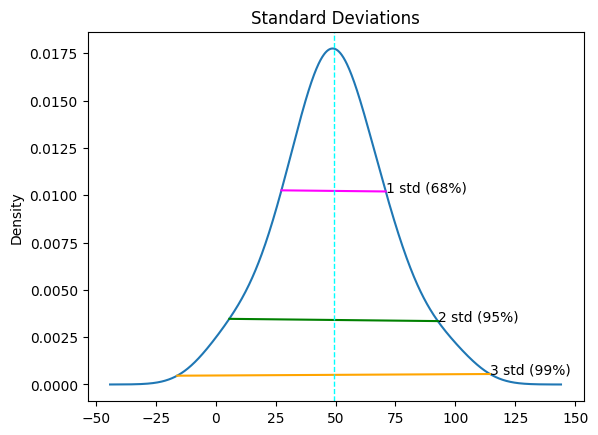

In [32]:
import scipy.stats as stats

col = df_students['Grade']
density = stats.gaussian_kde(col)

col.plot.density()
s = col.std()
m = col.mean()

# 1, 2, 3 Standardabweichungen
for mult, color, label in [(1, 'magenta', '1 std (68%)'),
                           (2, 'green', '2 std (95%)'),
                           (3, 'orange', '3 std (99%)')]:
    x = [m - mult * s, m + mult * s]
    y = density(x)
    plt.plot(x, y, color=color)
    plt.annotate(label, (x[1], y[1]))

plt.axvline(m, color='cyan', linestyle='--', linewidth=1)
plt.title('Standard Deviations')
plt.show()


## Deskriptive Statistik aller Spalten


In [33]:
print(df_students.describe())


       StudyHours      Grade
count   22.000000  22.000000
mean    10.522727  49.181818
std      3.487144  21.737912
min      1.000000   3.000000
25%      9.000000  36.250000
50%     10.000000  49.500000
75%     12.375000  62.750000
max     16.000000  97.000000


## Vergleich von Daten (Comparing Data)
Wir entfernen Studierende mit weniger als 1 Stunde Lernzeit.


In [34]:
df_sample = df_students[df_students['StudyHours'] > 1]
print(df_sample.head())


    Name  StudyHours  Grade   Pass
0    Dan       10.00   50.0  False
1  Joann       11.50   50.0  False
2  Pedro        9.00   47.0  False
3  Rosie       16.00   97.0   True
4  Ethan        9.25   49.0  False


### Vergleich: StudyHours (numerisch) vs Pass (kategorisch)


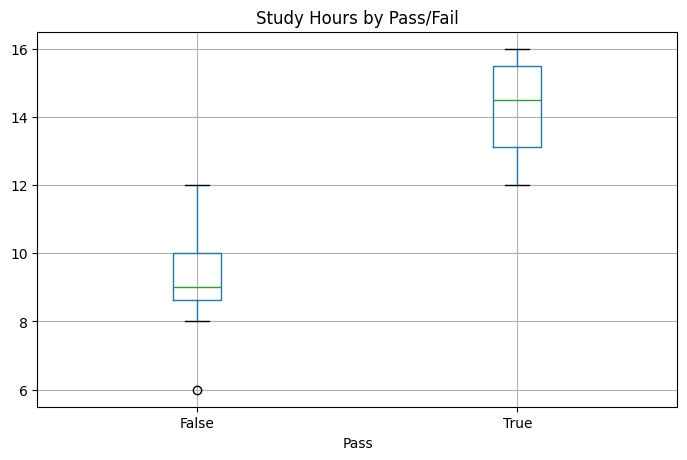

In [35]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8, 5))
plt.title('Study Hours by Pass/Fail')
plt.suptitle('')
plt.show()


### Vergleich: Zwei numerische Variablen


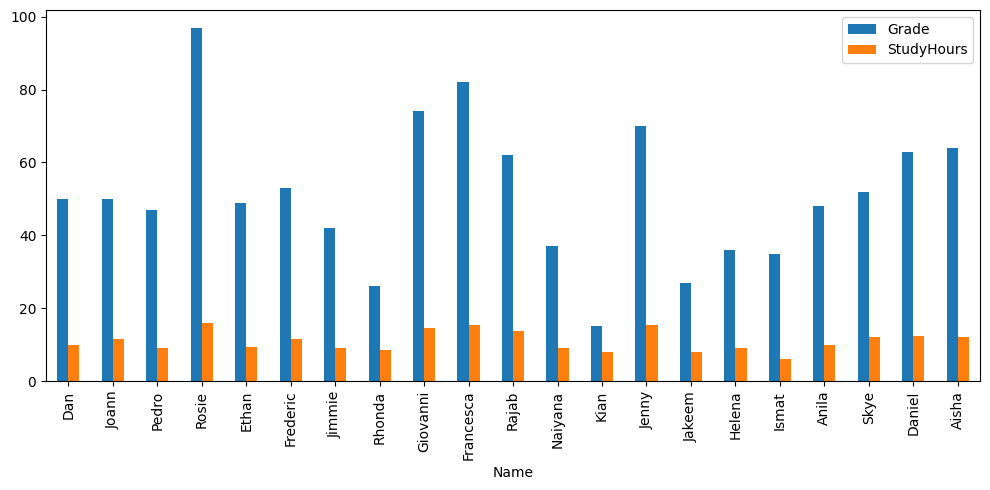

In [36]:
df_sample.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(10, 5))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Normalisierung (MinMaxScaler)


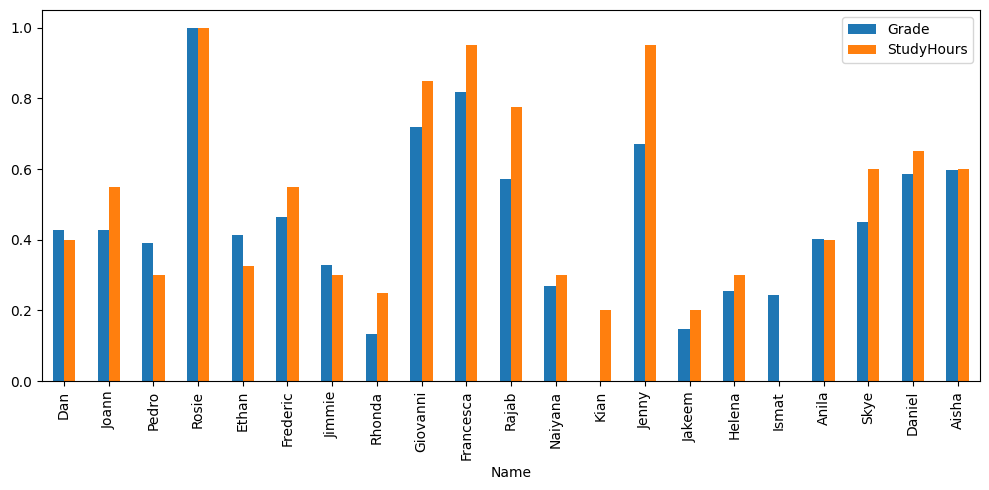

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()
df_normalized[['Grade', 'StudyHours']] = scaler.fit_transform(df_normalized[['Grade', 'StudyHours']])

df_normalized.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(10, 5))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Korrelation zwischen Lernzeit und Note


In [38]:
corr_value = df_normalized['Grade'].corr(df_normalized['StudyHours'])
print(f"Korrelation zwischen Grade und StudyHours: {corr_value:.4f}")


Korrelation zwischen Grade und StudyHours: 0.9118


### Scatterplot + Regressionslinie


Slope: 6.3134
Intercept: -17.9164
f(x) = 6.3134x + -17.9164


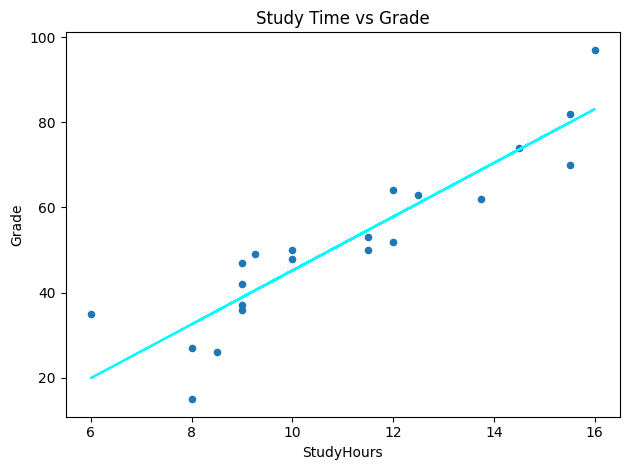

In [39]:
from scipy import stats

df_regression = df_sample[['Grade', 'StudyHours']].copy()
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print(f"Slope: {m:.4f}\nIntercept: {b:.4f}")
print(f"f(x) = {m:.4f}x + {b:.4f}")

df_regression['fx'] = (m * df_regression['StudyHours']) + b
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Plot
df_regression.plot.scatter(x='StudyHours', y='Grade', title='Study Time vs Grade')
plt.plot(df_regression['StudyHours'], df_regression['fx'], color='cyan')
plt.tight_layout()
plt.show()


### Regressions-Ergebnisse ansehen


In [40]:
print(df_regression[['StudyHours', 'Grade', 'fx', 'error']])


    StudyHours  Grade         fx      error
0        10.00   50.0  45.217846  -4.782154
1        11.50   50.0  54.687985   4.687985
2         9.00   47.0  38.904421  -8.095579
3        16.00   97.0  83.098400 -13.901600
4         9.25   49.0  40.482777  -8.517223
6        11.50   53.0  54.687985   1.687985
7         9.00   42.0  38.904421  -3.095579
8         8.50   26.0  35.747708   9.747708
9        14.50   74.0  73.628262  -0.371738
10       15.50   82.0  79.941687  -2.058313
11       13.75   62.0  68.893193   6.893193
12        9.00   37.0  38.904421   1.904421
13        8.00   15.0  32.590995  17.590995
14       15.50   70.0  79.941687   9.941687
15        8.00   27.0  32.590995   5.590995
16        9.00   36.0  38.904421   2.904421
17        6.00   35.0  19.964144 -15.035856
18       10.00   48.0  45.217846  -2.782154
19       12.00   52.0  57.844698   5.844698
20       12.50   63.0  61.001410  -1.998590
21       12.00   64.0  57.844698  -6.155302


### Vorhersage einer Note (Prediction)


In [41]:
def f(x, m=m, b=b):
    return m*x + b

study_time = 14
prediction = f(study_time)

import numpy as np
expected_grade = float(np.clip(prediction, 0, 100))

print(f"Studying for {study_time} hours/week may result in a grade of {expected_grade:.0f}")


Studying for 14 hours/week may result in a grade of 70


# 4. Übung Regression 

## Load the dataset
Wir laden die Datei `daily-bike-share.csv`, die tägliche Fahrradvermietungen sowie Wetter- und Kalenderdaten enthält. Diese Daten dienen als Grundlage zum Trainieren unseres Regressionsmodells.


In [43]:
import pandas as pd

# load the training dataset
bike_data = pd.read_csv('daily-bike-share.csv')
print(bike_data.head())


   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  
0           2  0.344167  0.363625  0.805833   0.160446      331  
1           2  0.363478  0.353739  0.696087   0.248539      131  
2           1  0.196364  0.189405  0.437273   0.248309      120  
3           1  0.200000  0.212122  0.590435   0.160296      108  
4           1  0.226957  0.229270  0.436957   0.186900       82  


## Feature engineering
Wir erstellen eine neue Spalte `day`, um den Tag des Monats aus der Datumsangabe `dteday` zu extrahieren. Dadurch gewinnen wir eine zusätzliche zeitliche Variable.


In [44]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
print(bike_data.head(32))


    instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1   1/1/2011       1   0     1        0        6           0   
1         2   1/2/2011       1   0     1        0        0           0   
2         3   1/3/2011       1   0     1        0        1           1   
3         4   1/4/2011       1   0     1        0        2           1   
4         5   1/5/2011       1   0     1        0        3           1   
5         6   1/6/2011       1   0     1        0        4           1   
6         7   1/7/2011       1   0     1        0        5           1   
7         8   1/8/2011       1   0     1        0        6           0   
8         9   1/9/2011       1   0     1        0        0           0   
9        10  1/10/2011       1   0     1        0        1           1   
10       11  1/11/2011       1   0     1        0        2           1   
11       12  1/12/2011       1   0     1        0        3           1   
12       13  1/13/2011       1   0    

## Descriptive statistics
Mit `describe()` erhalten wir statistische Kennzahlen (z. B. Mittelwert, Minimum, Maximum, Standardabweichung) für die numerischen Spalten und sehen, wie die Werte verteilt sind.


In [45]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()


,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


## Visualize rental distribution
Wir untersuchen die Verteilung der Zielvariable `rentals` mit einem Histogramm und Boxplot, um Ausreißer und den allgemeinen Wertebereich zu erkennen.


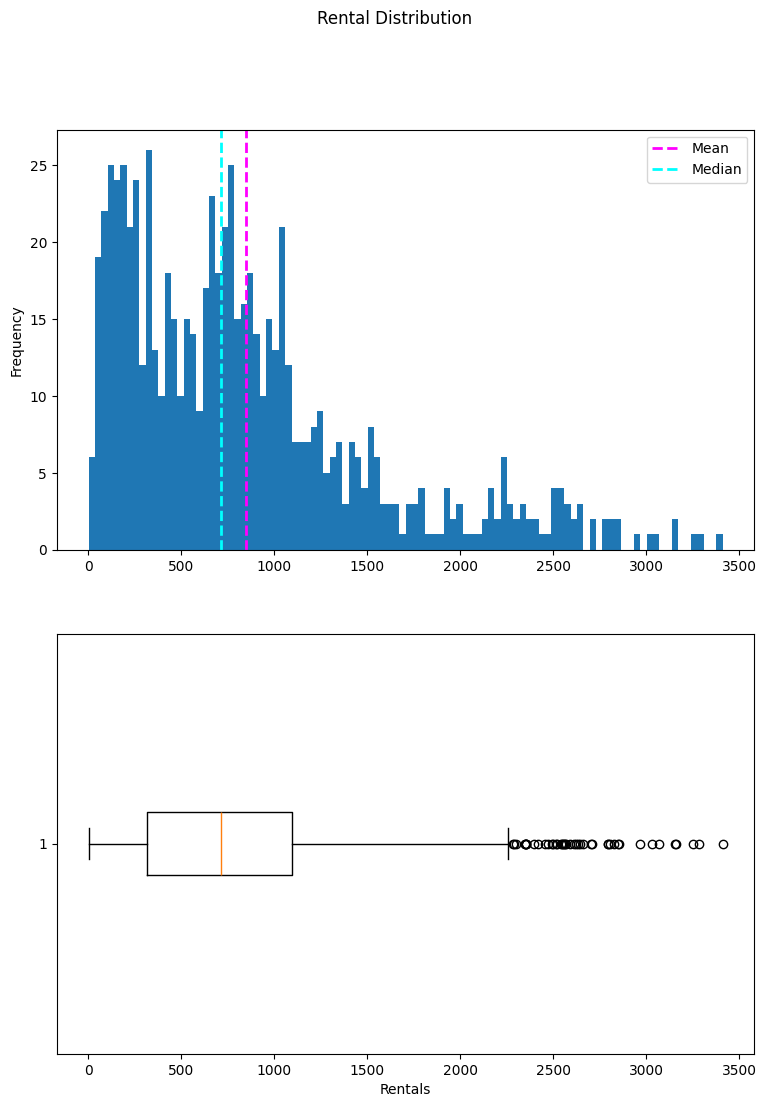

In [46]:
import matplotlib.pyplot as plt

label = bike_data['rentals']

fig, ax = plt.subplots(2, 1, figsize=(9, 12))

# Histogramm
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(), color='magenta', linestyle='--', linewidth=2, label='Mean')
ax[0].axvline(label.median(), color='cyan', linestyle='--', linewidth=2, label='Median')
ax[0].legend()

# Boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

fig.suptitle('Rental Distribution')
plt.show()


## Feature distribution
Hier betrachten wir die numerischen Features (`temp`, `atemp`, `hum`, `windspeed`), um zu prüfen, ob sie annähernd normalverteilt sind und ob Transformationen nötig sein könnten.


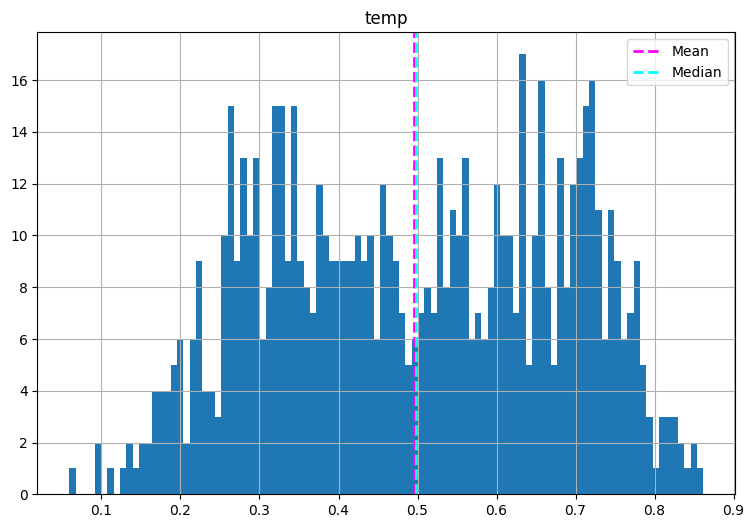

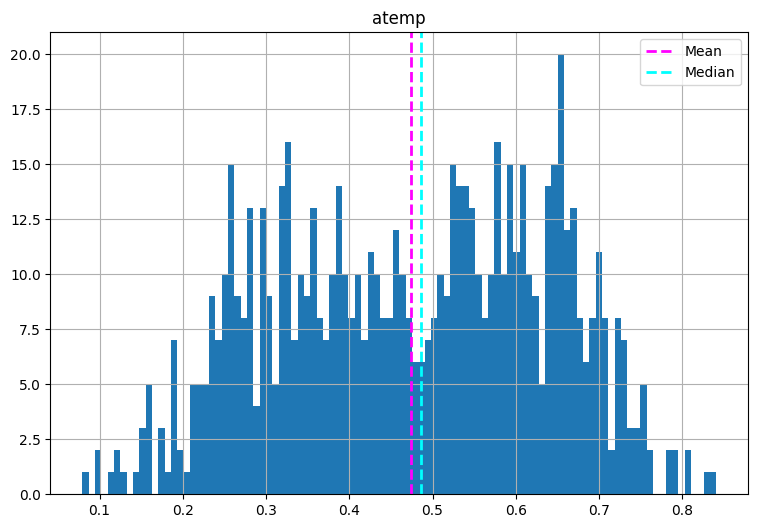

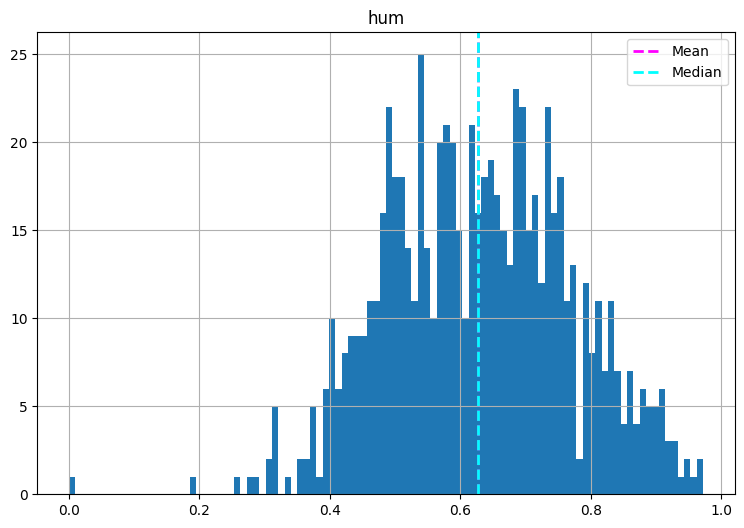

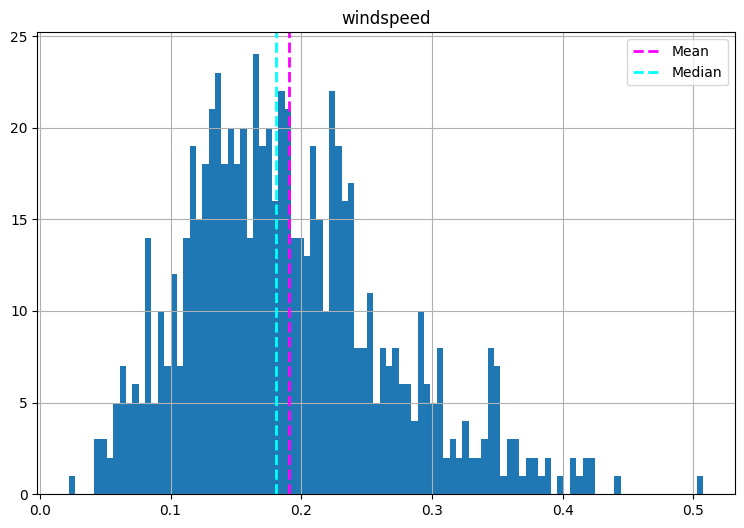

In [47]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='--', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='cyan', linestyle='--', linewidth=2, label='Median')
    ax.set_title(col)
    ax.legend()
plt.show()


## Explore categorical features
Wir visualisieren kategoriale Spalten wie `season`, `weekday` oder `weathersit` mithilfe von Balkendiagrammen, um zu sehen, wie oft jede Kategorie vorkommt.


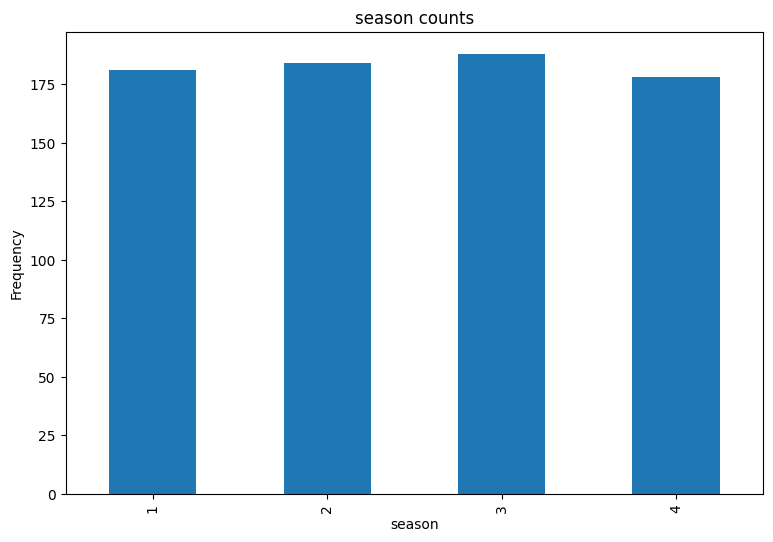

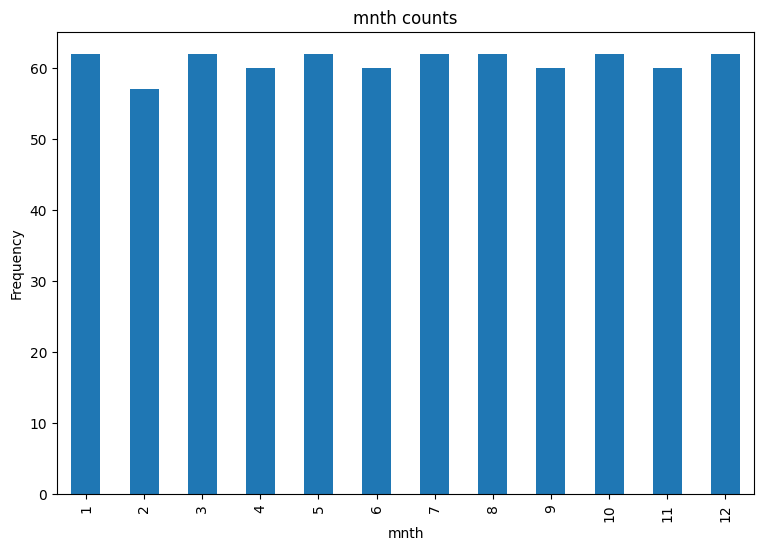

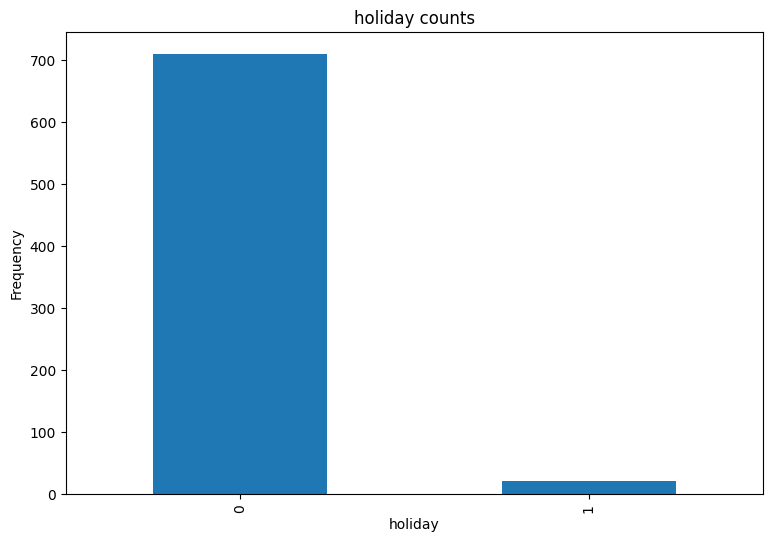

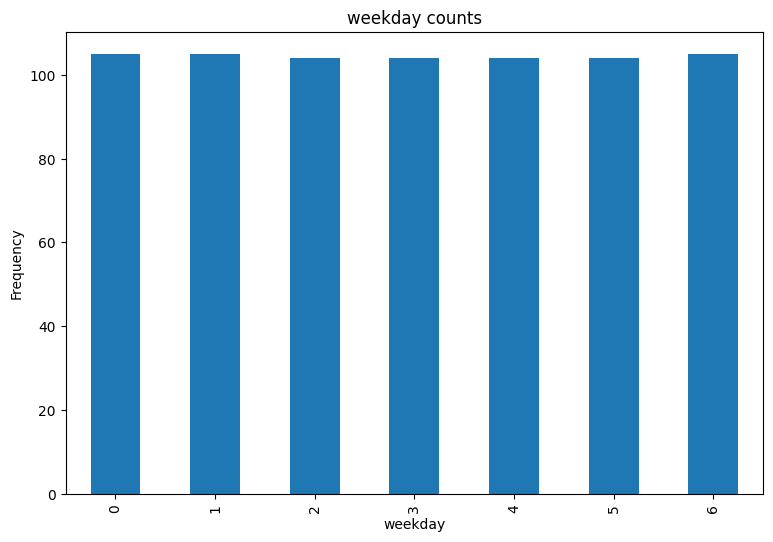

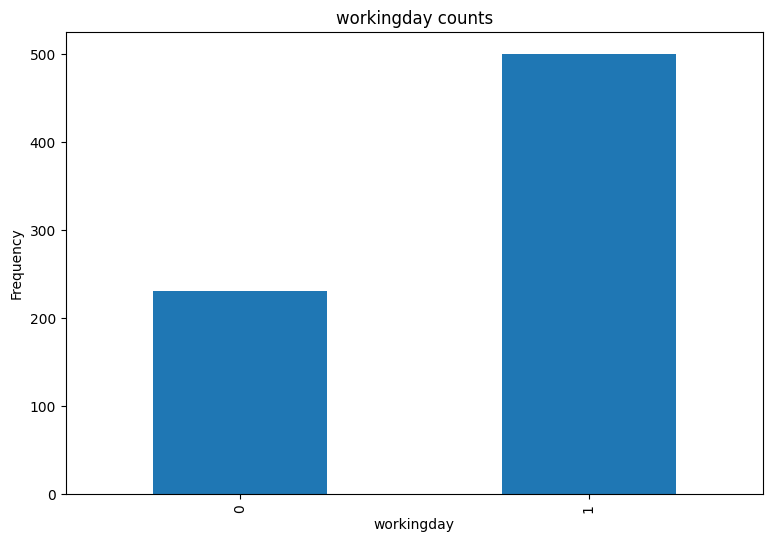

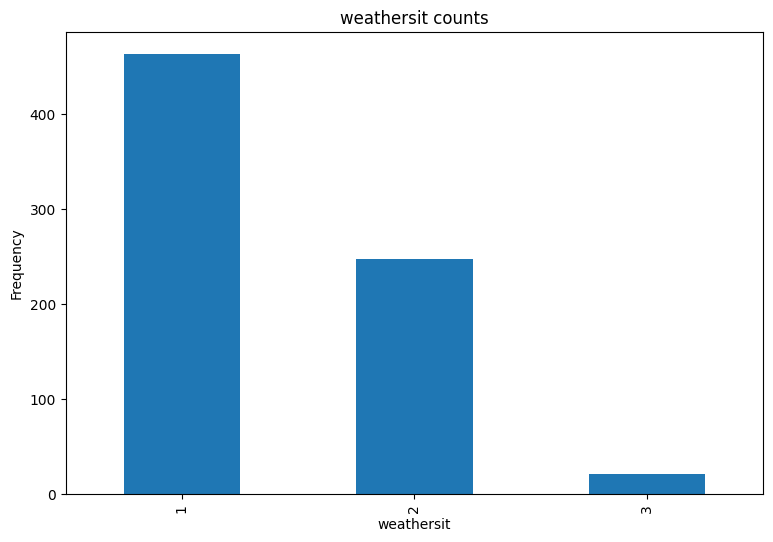

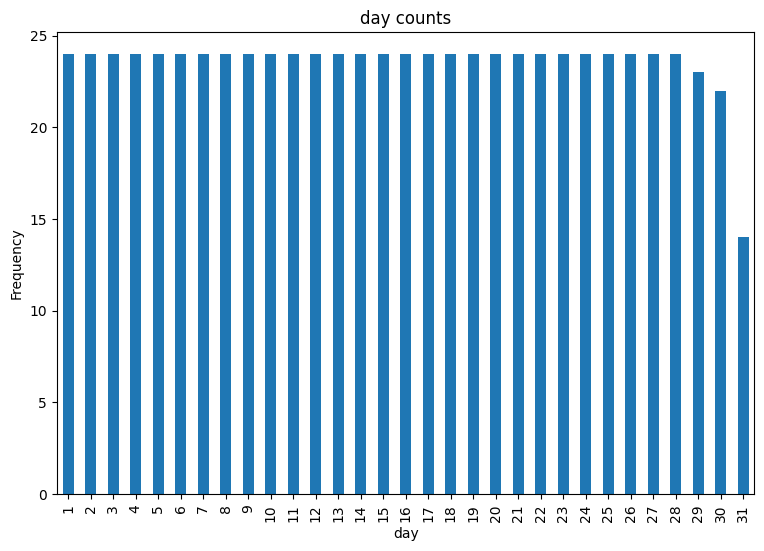

In [48]:
import numpy as np

categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit','day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax=ax)
    ax.set_title(f'{col} counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()


## Correlation analysis
Wir erstellen Streudiagramme zwischen numerischen Features und der Zielvariable `rentals` und berechnen die Korrelation, um lineare Beziehungen zu erkennen.


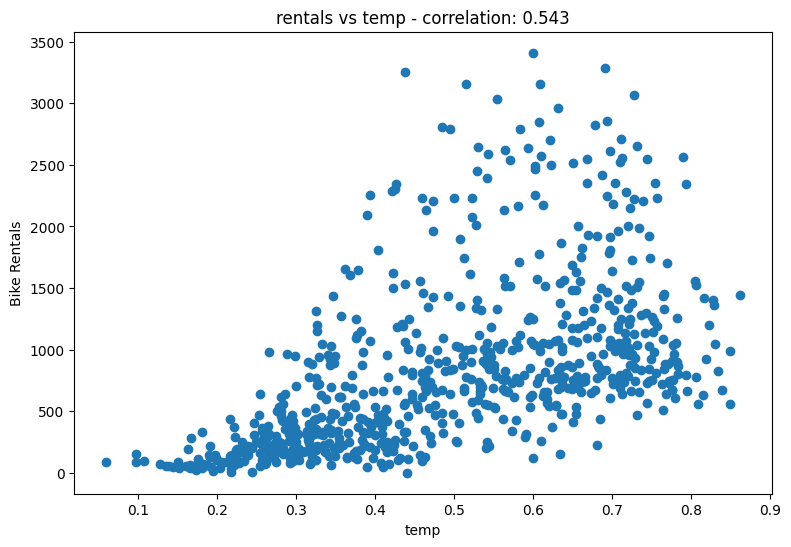

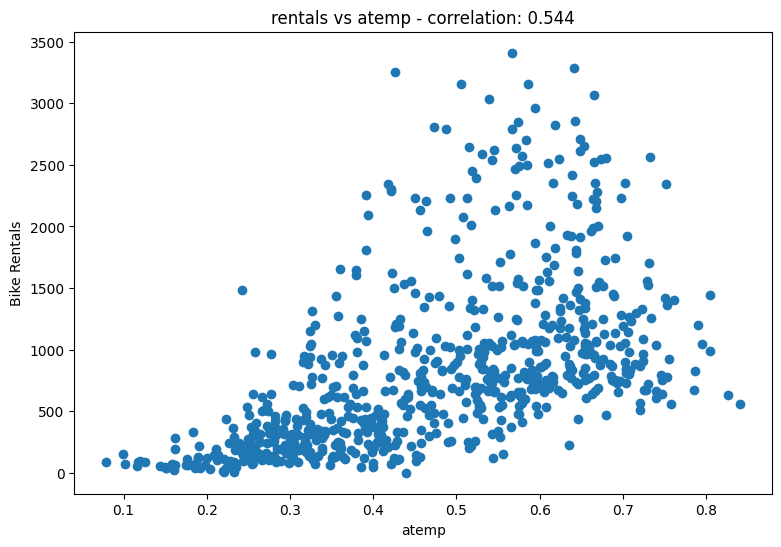

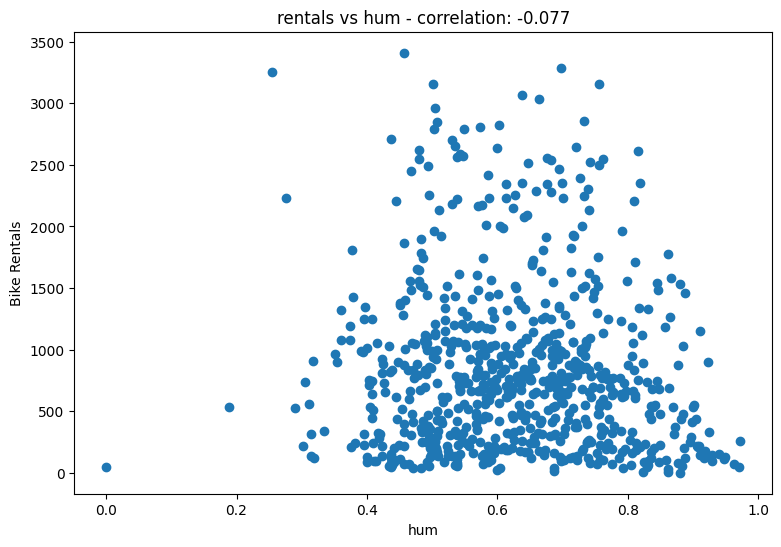

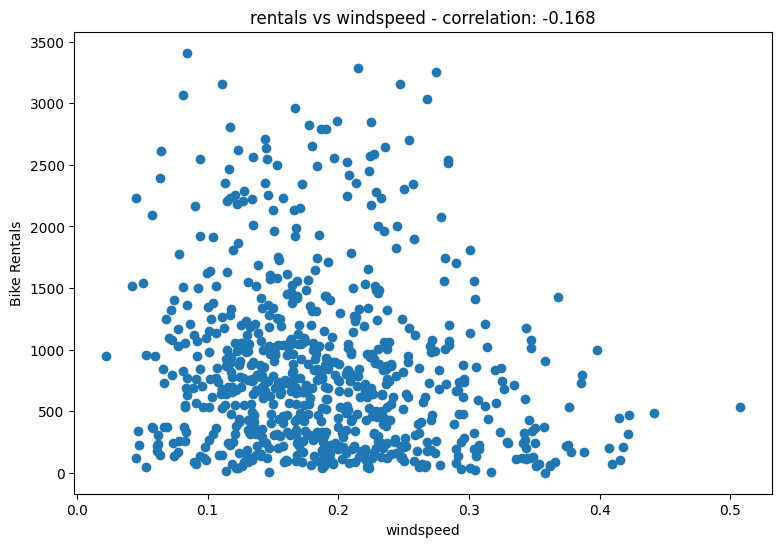

In [49]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    corr = feature.corr(label)
    ax.scatter(x=feature, y=label)
    ax.set_xlabel(col)
    ax.set_ylabel('Bike Rentals')
    ax.set_title(f'rentals vs {col} - correlation: {corr:.3f}')
plt.show()


## Boxplots for categorical variables
Wir prüfen, wie sich `rentals` in verschiedenen Kategorien unterscheiden (z. B. nach `season`, `holiday` oder `weekday`), um mögliche Einflüsse auf die Vermietungen zu erkennen.


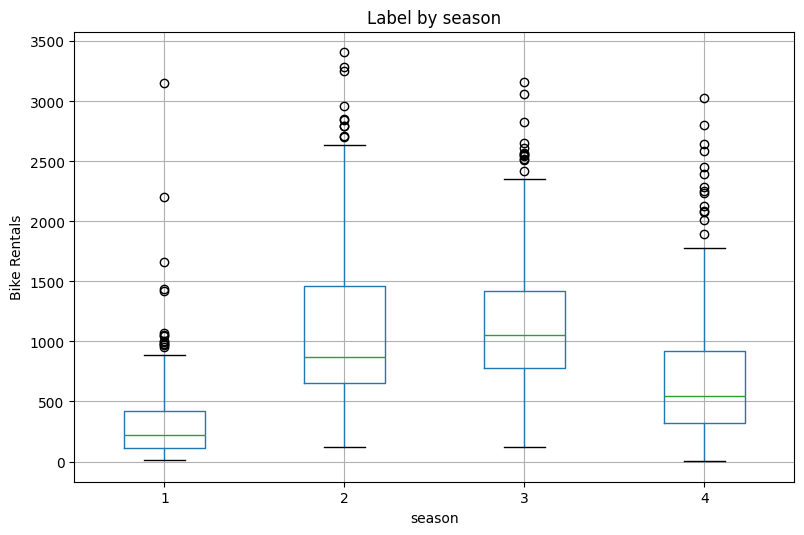

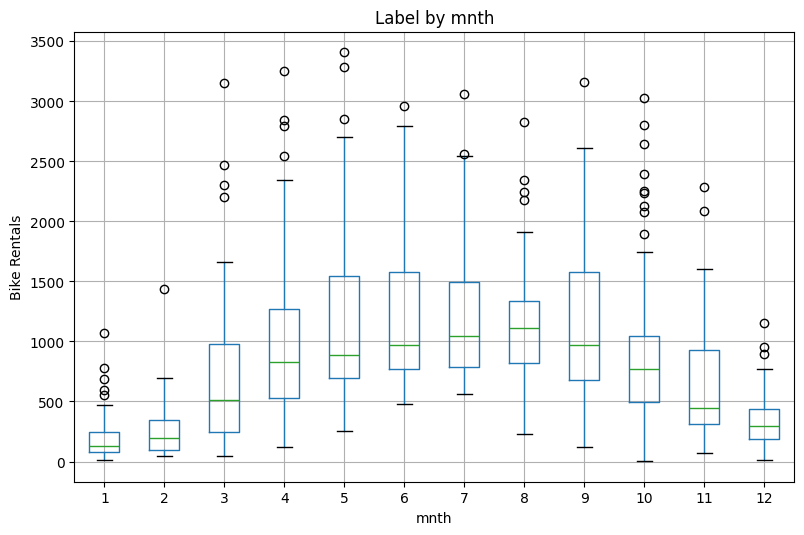

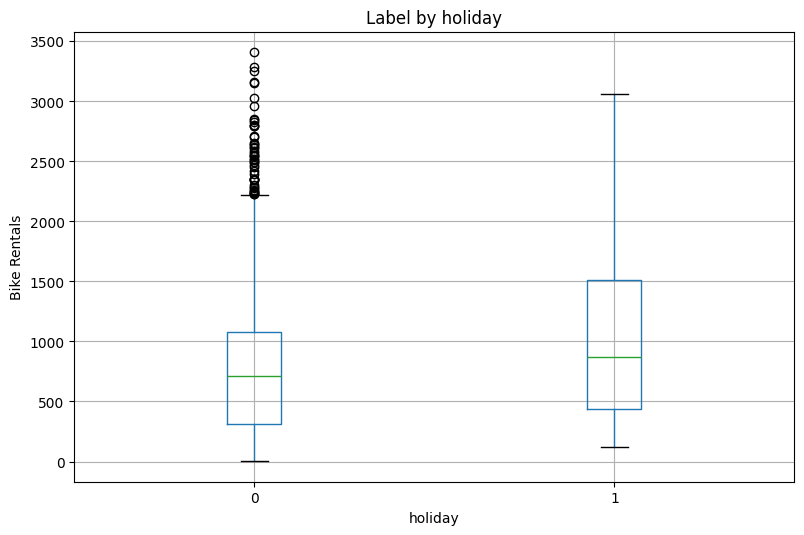

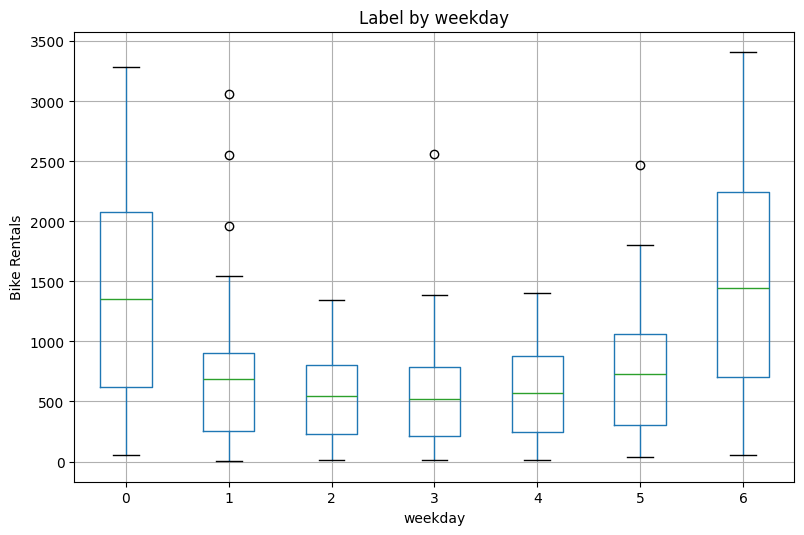

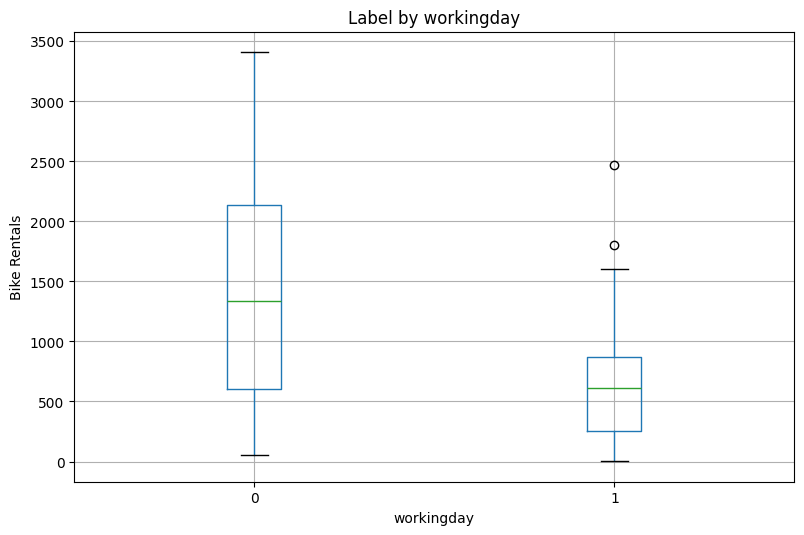

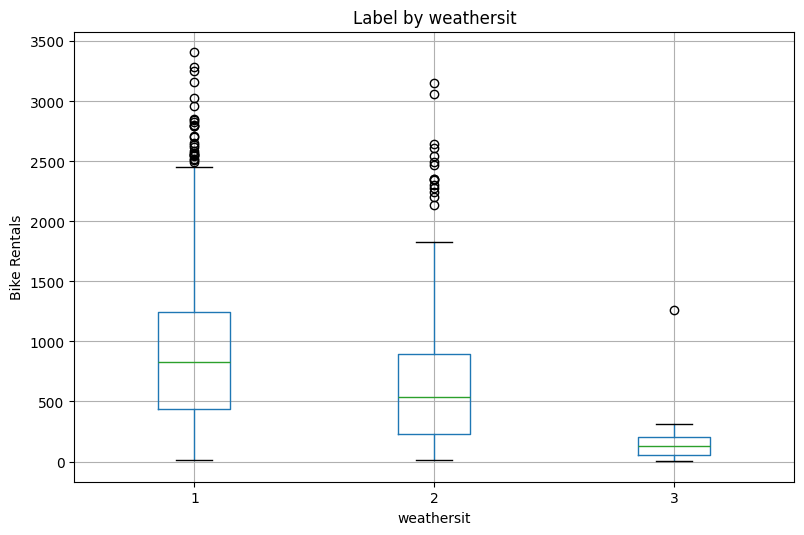

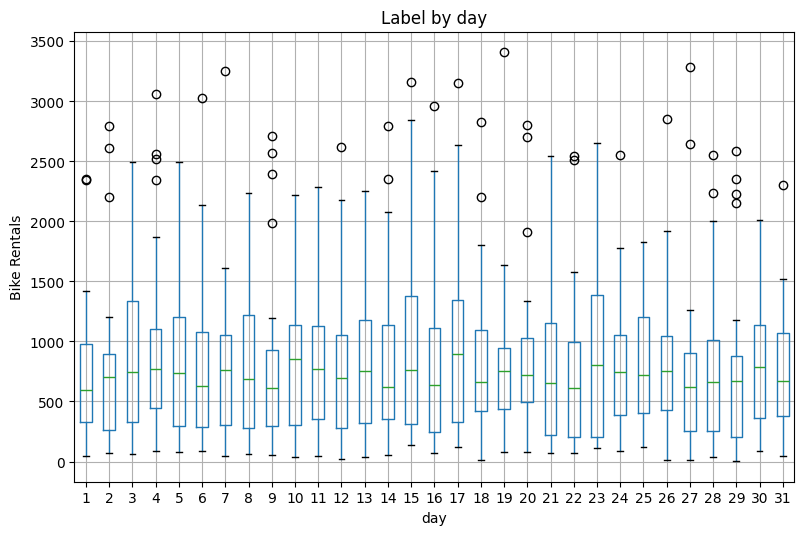

In [50]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column='rentals', by=col, ax=ax)
    ax.set_title(f'Label by {col}')
    ax.set_ylabel('Bike Rentals')
    plt.suptitle('')  # überschrift ausblenden
plt.show()


## Define features and labels
Wir trennen die unabhängigen Variablen (Features) `X` von der abhängigen Zielvariable `y` (`rentals`), um sie separat im Modell zu verwenden.


In [51]:
feature_cols = ['season','mnth','holiday','weekday','workingday','weathersit',
                'temp','atemp','hum','windspeed']

X = bike_data[feature_cols].values
y = bike_data['rentals'].values

print('Features (first 3 rows):\n', X[:3])
print('Labels (first 3):\n', y[:3])


Features (first 3 rows):
 [[1.       1.       0.       6.       0.       2.       0.344167 0.363625
  0.805833 0.160446]
 [1.       1.       0.       0.       0.       2.       0.363478 0.353739
  0.696087 0.248539]
 [1.       1.       0.       1.       1.       1.       0.196364 0.189405
  0.437273 0.248309]]
Labels (first 3):
 [331 131 120]


## Split data
Mit `train_test_split()` teilen wir die Daten in Trainings- (70 %) und Testdaten (30 %). So können wir die Modellleistung später objektiv überprüfen.


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0
)

print(f'Training Set: {X_train.shape[0]} rows')
print(f'Test Set: {X_test.shape[0]} rows')


Training Set: 511 rows
Test Set: 220 rows


## Train a linear regression model
Wir erstellen ein lineares Regressionsmodell mit `LinearRegression()` aus scikit-learn und trainieren es auf den Trainingsdaten (`fit`).


In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
model


LinearRegression()

## Make predictions
Das trainierte Modell wird auf den Testdaten angewendet, um die vorhergesagten Vermietungszahlen (`predictions`) zu berechnen.


In [54]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels (rounded):', np.round(predictions)[:10])
print('Actual labels             :', y_test[:10])


Predicted labels (rounded): [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels             : [2418  754  222   47  244  145  240  555 3252   38]


## Compare predicted vs actual
Wir erstellen ein Streudiagramm mit den tatsächlichen und den vorhergesagten Werten. Eine diagonale Linie zeigt an, wie gut die Prognosen mit der Realität übereinstimmen.


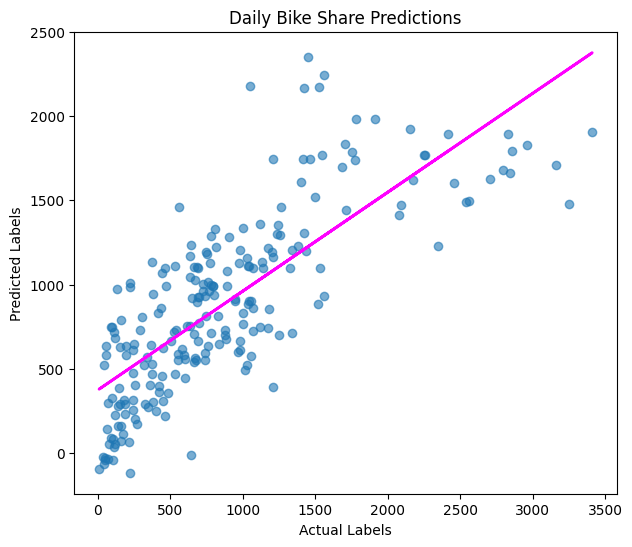

In [55]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# Trendlinie
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta', linewidth=2)

plt.show()


## Evaluate model performance
Wir berechnen drei Kennzahlen:
- **MSE (Mean Squared Error)**: mittlere quadratische Abweichung  
- **RMSE (Root Mean Squared Error)**: durchschnittlicher Fehler in Originaleinheiten  
- **R² (Determination Coefficient)**: Anteil der erklärten Varianz (je näher 1, desto besser)


In [56]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse  = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, predictions)

print(f'MSE : {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²  : {r2:.4f}')


MSE : 201972.56
RMSE: 449.41
R²  : 0.6040


## Summary
Wir haben Daten erkundet, ein lineares Regressionsmodell trainiert und mit MSE, RMSE und R² bewertet. Das Modell besitzt Vorhersagekraft, kann aber durch Feature-Engineering und erweiterte Algorithmen weiter verbessert werden.


In [57]:
print("Done: Daten erkundet, lineares Regressionsmodell trainiert und mit MSE/RMSE/R² bewertet.")


Done: Daten erkundet, lineares Regressionsmodell trainiert und mit MSE/RMSE/R² bewertet.


# 5. Übung 

### 1. Datensatz laden & vorbereiten

### 📊 Datensatz laden und vorbereiten

Der Datensatz zu **Fahrradvermietungen** wird geladen.  
Danach werden **Features (X)** und der **Zielwert (y = rentals)** getrennt.  
Anschließend wird der Datensatz zufällig in **Trainingsdaten (70 %)** und **Testdaten (30 %)** aufgeteilt.  
Damit wird sichergestellt, dass das Modell an **unbekannten Daten getestet** werden kann und keine Überanpassung entsteht.


In [58]:
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']].values, bike_data['rentals'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


### 2. Lasso-Regression (lineares Modell mit Regularisierung)

### ⚙️ Lasso-Regression

**Lasso** ist eine Variante der linearen Regression, die eine **Regularisierung** (Bestrafung großer Koeffizienten) anwendet.  
Das hilft, **Überanpassung (Overfitting)** zu vermeiden und **unwichtige Features abzuschwächen**.  
Anschließend wird das Modell mit dem **Testset bewertet** mithilfe der Kennzahlen **MSE**, **RMSE** und **R²**.


In [59]:
from sklearn.linear_model import Lasso
model = Lasso().fit(X_train, y_train)
predictions = model.predict(X_test)


### 3. Decision Tree Regressor


### 🌳 Decision Tree Regression

**Decision Trees** treffen regelbasierte Entscheidungen nach dem Prinzip *„wenn–dann–sonst“*.  
Jeder Knoten teilt die Daten nach einem **Merkmal**, bis am Ende **Blätter mit Vorhersagewerten** entstehen.  
**Vorteil:** Das Modell ist **leicht interpretierbar** und kann **nichtlineare Zusammenhänge** gut erfassen.  
Nach dem Training wird der **Baum visualisiert** und mit **Testdaten bewertet**.


In [60]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(X_train, y_train)


### 4. Random Forest Regressor (Ensemble-Verfahren)

### 🌲 Random Forest Regression

Ein **Random Forest** kombiniert viele **Entscheidungsbäume** und **mittelt deren Ergebnisse**.  
Dadurch wird das Modell **robuster** und **stabiler** als ein einzelner Baum.  
Typischerweise verbessert sich die **R²-Leistung** deutlich gegenüber einfachen Modellen.


In [61]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(X_train, y_train)


### 5. Gradient Boosting Regressor (Boosting-Verfahren)

### ⚡ Gradient Boosting Regression

**Gradient Boosting** baut mehrere **Entscheidungsbäume schrittweise aufeinander auf**.  
Jeder neue Baum versucht, die **Fehler des vorherigen** zu korrigieren.  
Dadurch entsteht ein **leistungsstarkes Modell mit hoher Genauigkeit**, jedoch mit **höherem Rechenaufwand**.


In [62]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(X_train, y_train)


### 6. Modellbewertung

### 📊 Modellbewertung – MSE, RMSE und R²

Zur Bewertung werden drei Kennzahlen berechnet:

- **MSE (Mean Squared Error):** Durchschnittlicher quadratischer Fehler.  
- **RMSE (Root Mean Squared Error):** Fehler im Originalmaßstab (z. B. Anzahl der Vermietungen).  
- **R² (Bestimmtheitsmaß):** Anteil der erklärten Varianz (*1 = perfekt*, *0 = zufällig*).  

Ein **höheres R²** und ein **niedrigerer RMSE** deuten auf ein **besseres Modell** hin.


In [63]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


In [66]:
print(f'MSE : {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²  : {r2:.4f}')


MSE : 201155.71
RMSE: 448.50
R²  : 0.6056


### 7. Visualisierung

### 📈 Vorhersagen vs. Tatsächliche Werte

Dieses Diagramm zeigt, **wie gut die Vorhersagen (Predicted)** mit den **tatsächlichen Werten (Actual)** übereinstimmen.  
Je **näher die Punkte an der Diagonalen** liegen, desto **besser** ist die **Modellgenauigkeit**.


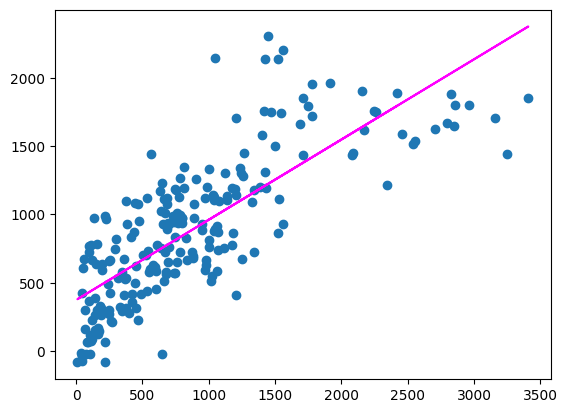

In [64]:
plt.scatter(y_test, predictions)
plt.plot(y_test, p(y_test), color='magenta')


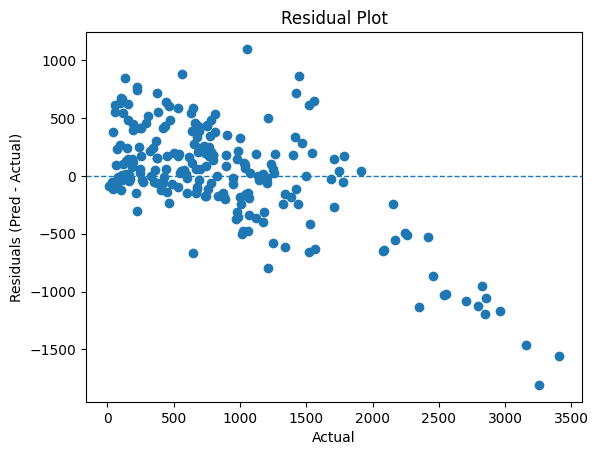

In [65]:
residuals = predictions - y_test
import matplotlib.pyplot as plt
plt.scatter(y_test, residuals)
plt.axhline(0, linestyle='--', linewidth=1)
plt.xlabel('Actual')
plt.ylabel('Residuals (Pred - Actual)')
plt.title('Residual Plot')
plt.show()


In [67]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


In [68]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


In [69]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


In [70]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


In [71]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = Lasso().fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'MSE : {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²  : {r2:.4f}')


MSE : 201155.71
RMSE: 448.50
R²  : 0.6056


# 7. Übung 

# Regression - Modelle optimieren und speichern

In diesem Notebook optimieren wir Regressionsmodelle durch:
- Hyperparameter-Tuning mit Grid Search
- Data Preprocessing mit Pipelines
- Model Persistence (Speichern & Laden)

**Ziel**: Die beste Vorhersageperformance für Fahrrad-Vermietungen erreichen.

---

## Schritt 1: Bibliotheken importieren und Daten laden

Zuerst laden wir alle benötigten Bibliotheken und das Bike-Sharing-Dataset.


In [72]:
# Codezelle 1: Imports und Daten laden
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Daten laden (vorher daily-bike-share.csv herunterladen!)
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day

# Features definieren
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

# Erste Zeilen anzeigen
print(bike_data.head())
print("\nDeskriptive Statistiken:")
print(bike_data[numeric_features + ['rentals']].describe())


   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  

Deskriptive Statistiken:
             temp       atemp         hum   windspeed      rentals
count  731.000000  731.000000  731.000000  731.0

## Schritt 2: Features und Labels trennen + Train-Test-Split

Wir trennen die **Features (X)** von den **Labels (y)** und splitten die Daten in:
- **70% Training** - zum Trainieren des Modells
- **30% Test** - zum Validieren der Performance


In [73]:
# Codezelle 2: Daten vorbereiten
# Features (X) und Labels (y) trennen
X = bike_data[['season','mnth', 'holiday','weekday','workingday',
               'weathersit','temp', 'atemp', 'hum', 'windspeed']].values
y = bike_data['rentals'].values

# Train-Test-Split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(f'Training Set: {X_train.shape[0]} Zeilen')
print(f'Test Set: {X_test.shape[0]} Zeilen')


Training Set: 511 Zeilen
Test Set: 220 Zeilen


## Schritt 3: Basis-Modell trainieren (Gradient Boosting)

Wir trainieren ein **Gradient Boosting Regressor** mit **Default-Hyperparametern** als Baseline, um später den Verbesserungseffekt durch Tuning zu sehen.

**Metriken**:
- **MSE** (Mean Squared Error) - Je kleiner, desto besser
- **RMSE** (Root Mean Squared Error) - Fehler in Vermietungs-Einheiten
- **R²** (R-squared) - Anteil erklärter Varianz (0-1, näher an 1 = besser)


Modell trainiert:
GradientBoostingRegressor() 

MSE: 104405.67
RMSE: 323.12
R2: 0.7953


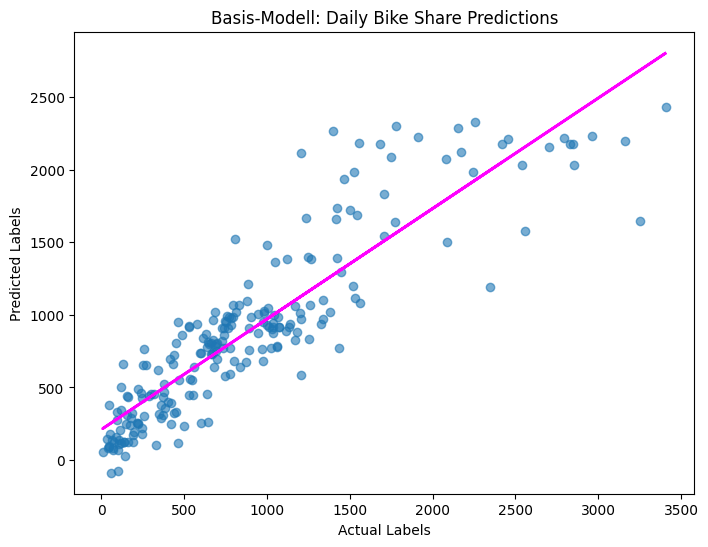

In [74]:
# Codezelle 3: Basis-Modell ohne Tuning
from sklearn.ensemble import GradientBoostingRegressor

# Modell trainieren
model = GradientBoostingRegressor().fit(X_train, y_train)
print("Modell trainiert:")
print(model, "\n")

# Evaluieren
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")

# Visualisierung
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Basis-Modell: Daily Bike Share Predictions')

# Regressionslinie
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta', linewidth=2)
plt.show()


## Schritt 4: Hyperparameter-Tuning mit Grid Search

**Grid Search** testet systematisch alle Kombinationen von Hyperparametern und wählt die beste aus.

**Getestete Hyperparameter**:
- `learning_rate`: [0.1, 0.5, 1.0] - Wie schnell das Modell lernt
- `n_estimators`: [50, 100, 150] - Anzahl der Bäume im Ensemble

**Cross-Validation (cv=3)**: Jede Kombination wird 3-fach validiert für robuste Ergebnisse.

⏳ *Grid Search kann 1-2 Minuten dauern...*


In [75]:
# Codezelle 4: Grid Search für beste Hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Algorithmus definieren
alg = GradientBoostingRegressor()

# Hyperparameter-Grid
params = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 150]
}

# Grid Search mit 3-Fold Cross-Validation
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)

print("Grid Search läuft... (kann 1-2 Minuten dauern)")
gridsearch.fit(X_train, y_train)

print("\n✅ Beste Parameter:", gridsearch.best_params_)
print(f"Bester R2-Score (CV): {gridsearch.best_score_:.4f}")

# Bestes Modell holen
model = gridsearch.best_estimator_
print("\nBestes Modell:")
print(model)


Grid Search läuft... (kann 1-2 Minuten dauern)

✅ Beste Parameter: {'learning_rate': 0.1, 'n_estimators': 100}
Bester R2-Score (CV): 0.7478

Bestes Modell:
GradientBoostingRegressor()


## Schritt 5: Optimiertes Modell evaluieren

Jetzt testen wir das beste Modell aus dem Grid Search auf unseren Test-Daten.

**Erwartung**: Bessere Metriken als das Basis-Modell (Schritt 3)!


Optimiertes Modell Performance:
MSE: 104065.11
RMSE: 322.59
R2: 0.7960


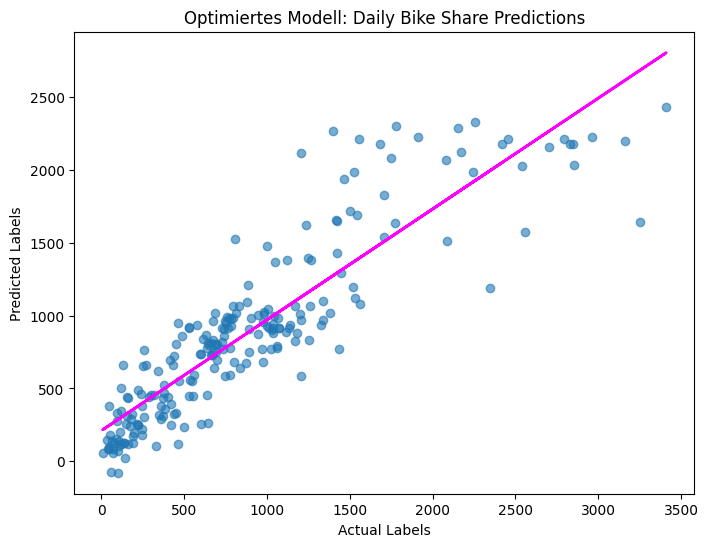

In [76]:
# Codezelle 5: Optimiertes Modell evaluieren
# Vorhersagen mit bestem Modell
predictions = model.predict(X_test)

# Metriken
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Optimiertes Modell Performance:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")

# Visualisierung
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Optimiertes Modell: Daily Bike Share Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta', linewidth=2)
plt.show()


## Schritt 6: Pipeline mit Preprocessing erstellen

Eine **Pipeline** kombiniert Preprocessing und Modell in einem Objekt.

**Preprocessing-Schritte**:
1. **Numerische Features** (temp, atemp, hum, windspeed): 
   - `StandardScaler` - Skaliert auf Mittelwert=0, Standardabweichung=1

2. **Kategorische Features** (season, mnth, holiday, weekday, workingday, weathersit):
   - `OneHotEncoder` - Konvertiert Kategorien in Binär-Vektoren

**Vorteil**: Bei neuen Daten werden automatisch dieselben Transformationen angewendet!


In [77]:
# Codezelle 6: Pipeline mit Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Preprocessing für numerische Features (Spalten 6-9)
numeric_features_idx = [6, 7, 8, 9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing für kategorische Features (Spalten 0-5)
categorical_features_idx = [0, 1, 2, 3, 4, 5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor kombinieren
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_idx),
        ('cat', categorical_transformer, categorical_features_idx)
    ])

# Vollständige Pipeline: Preprocessing + Modell
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Pipeline trainieren
print("Pipeline wird trainiert...")
model = pipeline.fit(X_train, y_train)
print("✅ Pipeline trainiert!")
print(model)


Pipeline wird trainiert...
✅ Pipeline trainiert!
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


## Schritt 7: Pipeline-Modell evaluieren

Wir evaluieren das Modell **mit Preprocessing** und vergleichen die Performance mit den vorherigen Modellen.

**Frage**: Verbessert Preprocessing die Vorhersagen?


Pipeline-Modell (mit Preprocessing):
MSE: 105443.39
RMSE: 324.72
R2: 0.7933


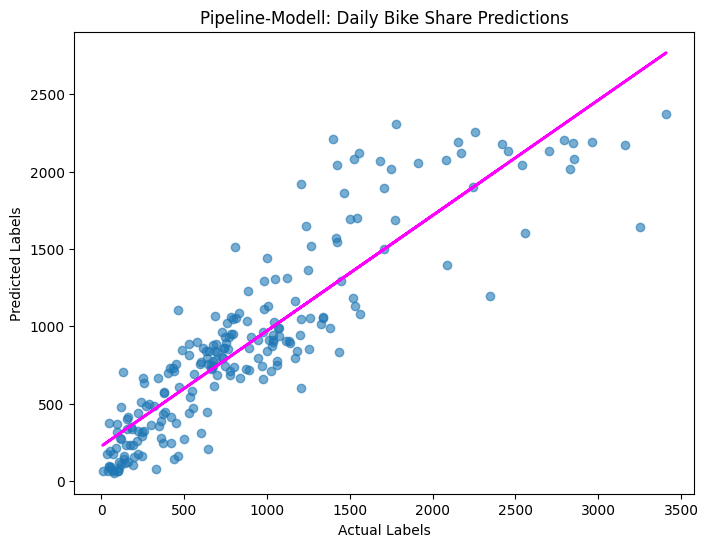

In [78]:
# Codezelle 7: Pipeline-Modell evaluieren
# Vorhersagen
predictions = model.predict(X_test)

# Metriken
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Pipeline-Modell (mit Preprocessing):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")

# Visualisierung
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Pipeline-Modell: Daily Bike Share Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta', linewidth=2)
plt.show()


## Schritt 8: Alternative Pipeline mit Random Forest

Wir testen einen anderen Algorithmus in der Pipeline: **Random Forest** statt Gradient Boosting.

**Random Forest**:
- Erstellt viele Bäume parallel und unabhängig
- Finale Vorhersage = Durchschnitt aller Bäume
- Oft robuster und schneller zu trainieren

**Vergleich**: Welcher Algorithmus performt besser?


Random Forest Pipeline wird trainiert...
✅ Random Forest Pipeline trainiert!

Random Forest Pipeline:
MSE: 104241.87
RMSE: 322.87
R2: 0.7956


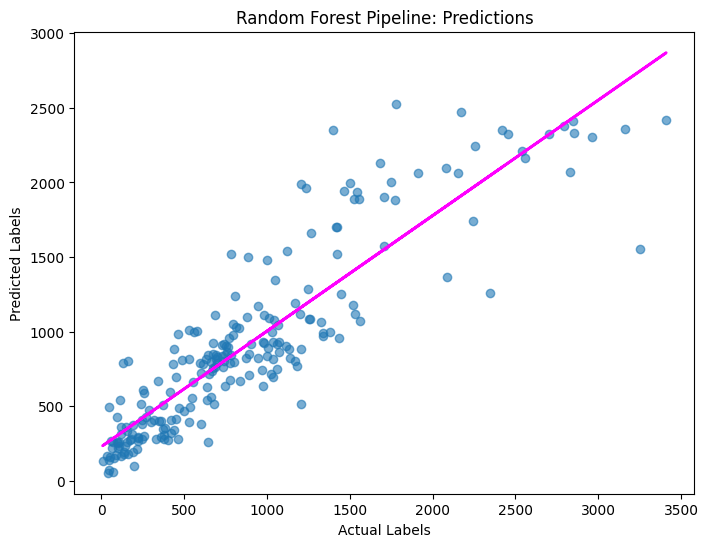

In [79]:
# Codezelle 8: Pipeline mit Random Forest statt Gradient Boosting
from sklearn.ensemble import RandomForestRegressor

# Neue Pipeline mit Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Trainieren
print("Random Forest Pipeline wird trainiert...")
model_rf = pipeline_rf.fit(X_train, y_train)
print("✅ Random Forest Pipeline trainiert!")

# Evaluieren
predictions_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, predictions_rf)

print(f"\nRandom Forest Pipeline:")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R2: {r2_rf:.4f}")

# Visualisierung
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_rf, alpha=0.6)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Random Forest Pipeline: Predictions')

z = np.polyfit(y_test, predictions_rf, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta', linewidth=2)
plt.show()


## Schritt 9: Modell speichern

Wir speichern das trainierte Modell als `.pkl` Datei mit **joblib**.

**Model Persistence** erlaubt uns:
- Modell einmal trainieren, mehrfach verwenden
- Modell mit anderen teilen
- Modell in Produktion deployen

💾 Das gespeicherte Modell enthält **alle Preprocessing-Schritte** der Pipeline!


In [80]:
# Codezelle 9: Modell speichern
import joblib

# Modell als .pkl Datei speichern
filename = './bike-share.pkl'
joblib.dump(model, filename)

print(f"✅ Modell gespeichert als: {filename}")


✅ Modell gespeichert als: ./bike-share.pkl


## Schritt 10: Modell laden und verwenden

Wir laden das gespeicherte Modell und machen eine **Vorhersage für morgen** basierend auf der Wettervorhersage.

**Beispiel-Features**: [season, month, holiday, weekday, workingday, weather, temp, atemp, humidity, windspeed]

🔮 **Inferencing/Scoring**: Verwendung des Modells für neue Vorhersagen


In [81]:
# Codezelle 10: Modell laden und Vorhersagen machen
# Modell laden
loaded_model = joblib.load(filename)
print("✅ Modell geladen!")

# Neue Beobachtung (z.B. morgiges Wetter)
X_new = np.array([[1, 1, 0, 3, 1, 1, 0.226957, 0.22927, 0.436957, 0.1869]])

print(f'\nNeue Beobachtung: {list(X_new[0])}')

# Vorhersage machen
result = loaded_model.predict(X_new)
print(f'Vorhersage: {np.round(result[0]):.0f} Vermietungen')


✅ Modell geladen!

Neue Beobachtung: [np.float64(1.0), np.float64(1.0), np.float64(0.0), np.float64(3.0), np.float64(1.0), np.float64(1.0), np.float64(0.226957), np.float64(0.22927), np.float64(0.436957), np.float64(0.1869)]
Vorhersage: 122 Vermietungen


## Schritt 11: Batch-Vorhersagen für mehrere Tage

Das Modell kann **mehrere Vorhersagen gleichzeitig** machen - ideal für 5-Tage-Wettervorhersagen!

**Use Case**: Ein Fahrradverleih plant Personal und Inventar basierend auf erwarteten Vermietungen.

📊 **Ergebnis**: Vorhersagen für die nächsten 5 Tage


In [82]:
# Codezelle 11: Batch-Vorhersagen (5-Tage-Wettervorhersage)
# Array mit 5-Tage-Wettervorhersage
X_new_batch = np.array([
    [0, 1, 1, 0, 0, 1, 0.344167, 0.363625, 0.805833, 0.160446],
    [0, 1, 0, 1, 0, 1, 0.363478, 0.353739, 0.696087, 0.248539],
    [0, 1, 0, 2, 0, 1, 0.196364, 0.189405, 0.437273, 0.248309],
    [0, 1, 0, 3, 0, 1, 0.2, 0.212122, 0.590435, 0.160296],
    [0, 1, 0, 4, 0, 1, 0.226957, 0.22927, 0.436957, 0.1869]
])

# Batch-Vorhersage
results = loaded_model.predict(X_new_batch)

print('5-Tage Vermietungs-Vorhersagen:')
for i, prediction in enumerate(results, 1):
    print(f'Tag {i}: {np.round(prediction):.0f} Vermietungen')


5-Tage Vermietungs-Vorhersagen:
Tag 1: 493 Vermietungen
Tag 2: 929 Vermietungen
Tag 3: 428 Vermietungen
Tag 4: 471 Vermietungen
Tag 5: 491 Vermietungen


## ✅ Zusammenfassung

In diesem Notebook haben wir gelernt:

1. **Hyperparameter-Tuning** - Grid Search findet beste Parameter automatisch
2. **Data Preprocessing** - Scaling & Encoding verbessern Modellperformance
3. **Pipelines** - Kombinieren Preprocessing + Modell für konsistente Transformationen
4. **Model Comparison** - Verschiedene Algorithmen systematisch vergleichen
5. **Model Persistence** - Modelle speichern und wiederverwenden

### Key Takeaways 🎯

- Grid Search testet alle Hyperparameter-Kombinationen systematisch
- Pipelines machen Preprocessing reproduzierbar
- Ensemble-Methoden (Random Forest, Gradient Boosting) haben meist beste Performance
- Gespeicherte Modelle können jederzeit für neue Vorhersagen verwendet werden

**Nächste Schritte**: Diese Techniken auf eigene Datasets anwenden! 🚀


# 📚 6 Lernpunkte: Optimieren & Speichern von Modellen im heft notieren 

## 1. Grid Search findet beste Hyperparameter automatisch
`GridSearchCV` testet alle Kombinationen (z.B. 3×3=9 Modelle) und wählt das beste mit Cross-Validation (cv=3) → **höhere Genauigkeit ohne manuelles Probieren**

## 2. Pipelines kombinieren Preprocessing + Modell
`Pipeline([preprocessor, regressor])` macht Transformationen automatisch bei neuen Daten → **konsistent & reproduzierbar**

## 3. StandardScaler normalisiert numerische Features
Skaliert Features auf Mittelwert=0, Std=1 → **Modell lernt effektiver**, da alle Features gleiche Skala haben

## 4. OneHotEncoder konvertiert Kategorien zu Binär
"Fahrrad"→(1,0,0), "Auto"→(0,1,0) → **Modell versteht Text als Zahlen**

## 5. joblib speichert trainierte Modelle
→ **einmal trainieren, für immer verwenden** (Production-Ready!)

## 6. Batch-Vorhersagen für mehrere Inputs
`model.predict(X_new_batch)` macht mehrere Vorhersagen gleichzeitig → **ideal für 5-Tage-Prognosen**

---

## 🎓 Merksatz
**Pipeline + Grid Search + joblib = Complete ML Workflow ✅**

